## Import Libraries

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
# Importing Libraries
import torch
import torchvision
#import torchvision.transforms as transforms
#from torchvision import datasets
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install torchinfo
import torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/ERA_v1/Session8/Assignment/

/content/drive/MyDrive/ERA_v1/Session8/Assignment


In [ ]:
# Import custom module data_transforms and relevant functions
import data_transforms
from data_transforms import get_train_transforms, get_test_transforms

In [ ]:
# Import custom module utils and relevant functions
import utils
from utils import display_model_stats, show_cifar10_incorrect_predictions
from utils import get_incorrect_test_predictions, show_cifar10_images

In [ ]:
SEED = 11

# Set seed for reproducibility
torch.manual_seed(SEED)

In [ ]:
train_transforms = torchvision.transforms.Compose(get_train_transforms())
test_transforms = torchvision.transforms.Compose(get_test_transforms())

In [ ]:
# Import custom module dataset and relevant functions
import dataset
from dataset import download_train_data, download_test_data, get_loader

In [ ]:
os.chdir(".")
# Download the Train and test data sets
train_dataset = download_train_data(train_transforms)
test_dataset = download_test_data(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Check if CUDA is available
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [ ]:
# Load train and test data sets
train_loader, test_loader = get_loader(train_dataset, test_dataset, use_cuda)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Find the existing classes in the available data set
classes = train_dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Find the count of images present in each of the classes of the available data set
class_count = {}
for _, index in train_dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

In [ ]:
# Extract the images and corresponding labels separately
dataiter = iter(train_loader)
tr_images, tr_labels = next(dataiter)

print(tr_images.shape)
print(tr_images[1].shape)
print(tr_labels[1].item())

torch.Size([512, 3, 32, 32])
torch.Size([3, 32, 32])
8


In [ ]:
print(tr_labels.unique(return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([33, 56, 54, 56, 45, 51, 49, 57, 59, 52]))


In [ ]:
# Find the shape and size of the train image data and labels
print(' - Numpy Shape:', tr_images.shape)
print(' - Tensor Shape:', tr_images.size())
print(' - min:', torch.min(tr_images))
print(' - max:', torch.max(tr_images))
print(' - mean:', torch.mean(tr_images))
print(' - std:', torch.std(tr_images))
print(' - var:', torch.var(tr_images))

 - Numpy Shape: torch.Size([512, 3, 32, 32])
 - Tensor Shape: torch.Size([512, 3, 32, 32])
 - min: tensor(-1.9879)
 - max: tensor(2.1317)
 - mean: tensor(-0.0114)
 - std: tensor(0.9968)
 - var: tensor(0.9936)


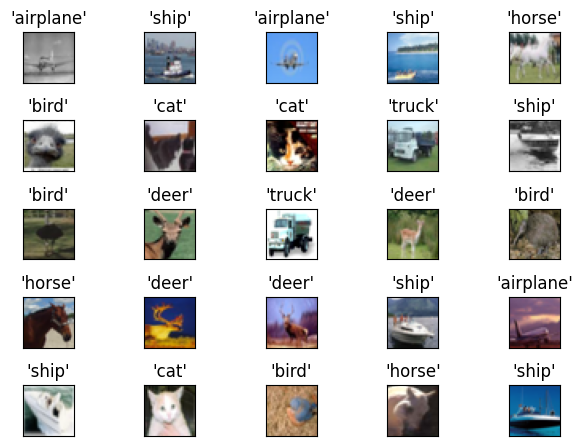

In [ ]:
# Display the Train sample images
show_cifar10_images(tr_images, tr_labels, classes)

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
# Import custom module data_transforms and relevant functions
import model
from model import Net_12, Net_13, Net_14, Net_15, train, test, clear_model_stats, get_epoch_test_loss

### Model-2 - Batch Normalization - Basic Structure


This model uses the Net_12 as the network architecture

In [ ]:
model_bn2 = Net_12('bn', 0.01).to(device)
summary(model_bn2, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 16, 28, 28]             512
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           4,608
      BatchNorm2d-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 64, 14, 14]          18,432
      BatchNorm2d-13           [-1, 64, 14, 14]             128
          Dropout-14           [-1, 64,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_bn2 = optim.SGD(model_bn2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_bn2, train_acc_bn2 = train(model_bn2,
                                            device,
                                            train_loader,
                                            optimizer_bn2,
                                            epoch)
    test_losses_bn2, test_acc_bn2 = test(model_bn2,
                                         device,
                                         test_loader)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.4593769311904907 Batch_id=97 Accuracy=33.92: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.6442, Accuracy: 3984/10000 (39.84%)

EPOCH: 1


Loss=1.1948672533035278 Batch_id=97 Accuracy=53.49: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 1.1933, Accuracy: 5659/10000 (56.59%)

EPOCH: 2


Loss=0.8764050602912903 Batch_id=97 Accuracy=62.43: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 1.0842, Accuracy: 6076/10000 (60.76%)

EPOCH: 3


Loss=0.8969944715499878 Batch_id=97 Accuracy=68.20: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.0098, Accuracy: 6388/10000 (63.88%)

EPOCH: 4


Loss=0.8194396495819092 Batch_id=97 Accuracy=71.77: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.9251, Accuracy: 6781/10000 (67.81%)

EPOCH: 5


Loss=0.722589910030365 Batch_id=97 Accuracy=74.76: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.7915, Accuracy: 7260/10000 (72.60%)

EPOCH: 6


Loss=0.7097180485725403 Batch_id=97 Accuracy=77.03: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.7705, Accuracy: 7286/10000 (72.86%)

EPOCH: 7


Loss=0.6340806484222412 Batch_id=97 Accuracy=78.98: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]



Test set: Average loss: 0.7479, Accuracy: 7430/10000 (74.30%)

EPOCH: 8


Loss=0.5730932950973511 Batch_id=97 Accuracy=80.77: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.8712, Accuracy: 7010/10000 (70.10%)

EPOCH: 9


Loss=0.5003686547279358 Batch_id=97 Accuracy=81.80: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7493, Accuracy: 7500/10000 (75.00%)

EPOCH: 10


Loss=0.4646122455596924 Batch_id=97 Accuracy=83.26: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.8471, Accuracy: 7201/10000 (72.01%)

EPOCH: 11


Loss=0.5373345017433167 Batch_id=97 Accuracy=84.39: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.6451, Accuracy: 7817/10000 (78.17%)

EPOCH: 12


Loss=0.4553045630455017 Batch_id=97 Accuracy=85.09: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.8625, Accuracy: 7217/10000 (72.17%)

EPOCH: 13


Loss=0.3834500014781952 Batch_id=97 Accuracy=86.05: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.7097, Accuracy: 7601/10000 (76.01%)

EPOCH: 14


Loss=0.3458017408847809 Batch_id=97 Accuracy=87.01: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.7257, Accuracy: 7621/10000 (76.21%)

EPOCH: 15


Loss=0.36390307545661926 Batch_id=97 Accuracy=87.48: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.7543, Accuracy: 7598/10000 (75.98%)

EPOCH: 16


Loss=0.3773175776004791 Batch_id=97 Accuracy=88.58: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.7451, Accuracy: 7703/10000 (77.03%)

EPOCH: 17


Loss=0.3307277262210846 Batch_id=97 Accuracy=88.92: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.8247, Accuracy: 7470/10000 (74.70%)

EPOCH: 18


Loss=0.31368952989578247 Batch_id=97 Accuracy=89.76: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.8822, Accuracy: 7362/10000 (73.62%)

EPOCH: 19


Loss=0.3814179003238678 Batch_id=97 Accuracy=90.29: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.7224, Accuracy: 7817/10000 (78.17%)



In [ ]:
train_losses_bn2 = [t.cpu().item() for t in train_losses_bn2]

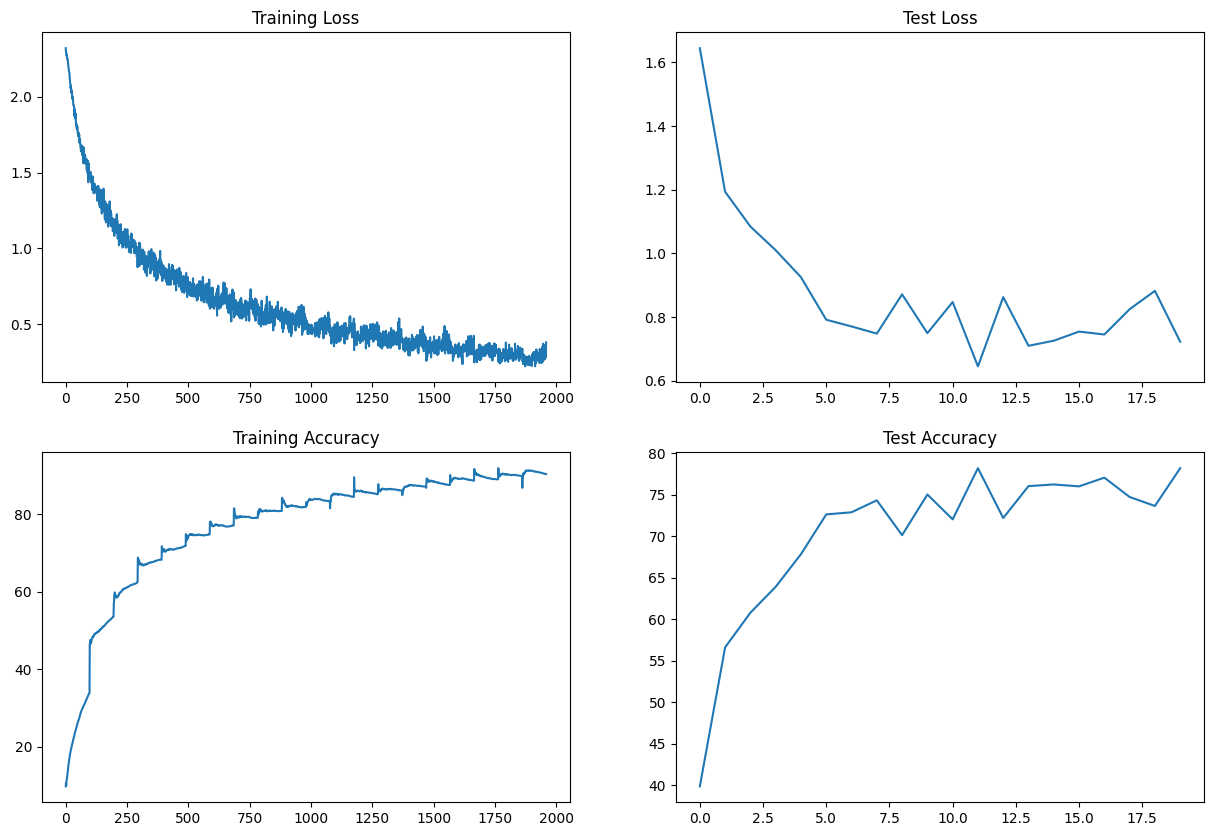

In [ ]:
display_model_stats(train_losses_bn2,
                    train_acc_bn2,
                    test_losses_bn2,
                    test_acc_bn2)

#### Code Block - Model-2 - Basic structure - BN

**Target:**

- Basic Network Structure
- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Batch Normalization used
- Dropout of 0.01

**Results:**

- Parameters: 153.616K
- Best Train Accuracy: 90.29%
- Best Test Accuracy: 78.17% (20th Epoch)

**Analysis:**
- Model over fitting
- Heavy model with huge parameter count for the given task

### Model-2 - Layer Normalization - Basic Structure


This model uses the Net_12 as the network architecture

In [ ]:
model_ln2 = Net_12('ln', 0.01).to(device)
summary(model_ln2, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 16, 28, 28]             512
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           4,608
        GroupNorm-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 64, 14, 14]          18,432
        GroupNorm-13           [-1, 64, 14, 14]             128
          Dropout-14           [-1, 64,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_ln2 = optim.SGD(model_ln2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_ln2, train_acc_ln2 = train(model_ln2,
                                            device,
                                            train_loader,
                                            optimizer_ln2,
                                            epoch)
    test_losses_ln2, test_acc_ln2 = test(model_ln2,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.9649627208709717 Batch_id=97 Accuracy=20.22: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]



Test set: Average loss: 2.0000, Accuracy: 2264/10000 (22.64%)

EPOCH: 1


Loss=1.5078508853912354 Batch_id=97 Accuracy=34.43: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 1.6376, Accuracy: 3930/10000 (39.30%)

EPOCH: 2


Loss=1.4688382148742676 Batch_id=97 Accuracy=44.41: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



Test set: Average loss: 1.4387, Accuracy: 4753/10000 (47.53%)

EPOCH: 3


Loss=1.2019803524017334 Batch_id=97 Accuracy=52.09: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]



Test set: Average loss: 1.2445, Accuracy: 5511/10000 (55.11%)

EPOCH: 4


Loss=1.1537538766860962 Batch_id=97 Accuracy=56.31: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]



Test set: Average loss: 1.0973, Accuracy: 6102/10000 (61.02%)

EPOCH: 5


Loss=1.0385324954986572 Batch_id=97 Accuracy=61.60: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



Test set: Average loss: 1.0155, Accuracy: 6379/10000 (63.79%)

EPOCH: 6


Loss=1.0815069675445557 Batch_id=97 Accuracy=65.42: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.9858, Accuracy: 6523/10000 (65.23%)

EPOCH: 7


Loss=0.7202891111373901 Batch_id=97 Accuracy=67.84: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.9127, Accuracy: 6812/10000 (68.12%)

EPOCH: 8


Loss=0.8524162769317627 Batch_id=97 Accuracy=69.89: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 0.8530, Accuracy: 6971/10000 (69.71%)

EPOCH: 9


Loss=0.7617793083190918 Batch_id=97 Accuracy=71.43: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.7957, Accuracy: 7234/10000 (72.34%)

EPOCH: 10


Loss=0.7056613564491272 Batch_id=97 Accuracy=73.91: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7563, Accuracy: 7387/10000 (73.87%)

EPOCH: 11


Loss=0.6913846135139465 Batch_id=97 Accuracy=75.49: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7955, Accuracy: 7214/10000 (72.14%)

EPOCH: 12


Loss=0.5986504554748535 Batch_id=97 Accuracy=76.58: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.7543, Accuracy: 7415/10000 (74.15%)

EPOCH: 13


Loss=0.6652920842170715 Batch_id=97 Accuracy=77.65: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.7250, Accuracy: 7486/10000 (74.86%)

EPOCH: 14


Loss=0.5481823086738586 Batch_id=97 Accuracy=78.89: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7046, Accuracy: 7592/10000 (75.92%)

EPOCH: 15


Loss=0.5508635640144348 Batch_id=97 Accuracy=79.73: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7094, Accuracy: 7545/10000 (75.45%)

EPOCH: 16


Loss=0.6135616898536682 Batch_id=97 Accuracy=80.18: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 0.6836, Accuracy: 7727/10000 (77.27%)

EPOCH: 17


Loss=0.5918359160423279 Batch_id=97 Accuracy=81.36: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.7186, Accuracy: 7597/10000 (75.97%)

EPOCH: 18


Loss=0.5465685725212097 Batch_id=97 Accuracy=81.98: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.7161, Accuracy: 7601/10000 (76.01%)

EPOCH: 19


Loss=0.5269179344177246 Batch_id=97 Accuracy=82.38: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.6849, Accuracy: 7676/10000 (76.76%)



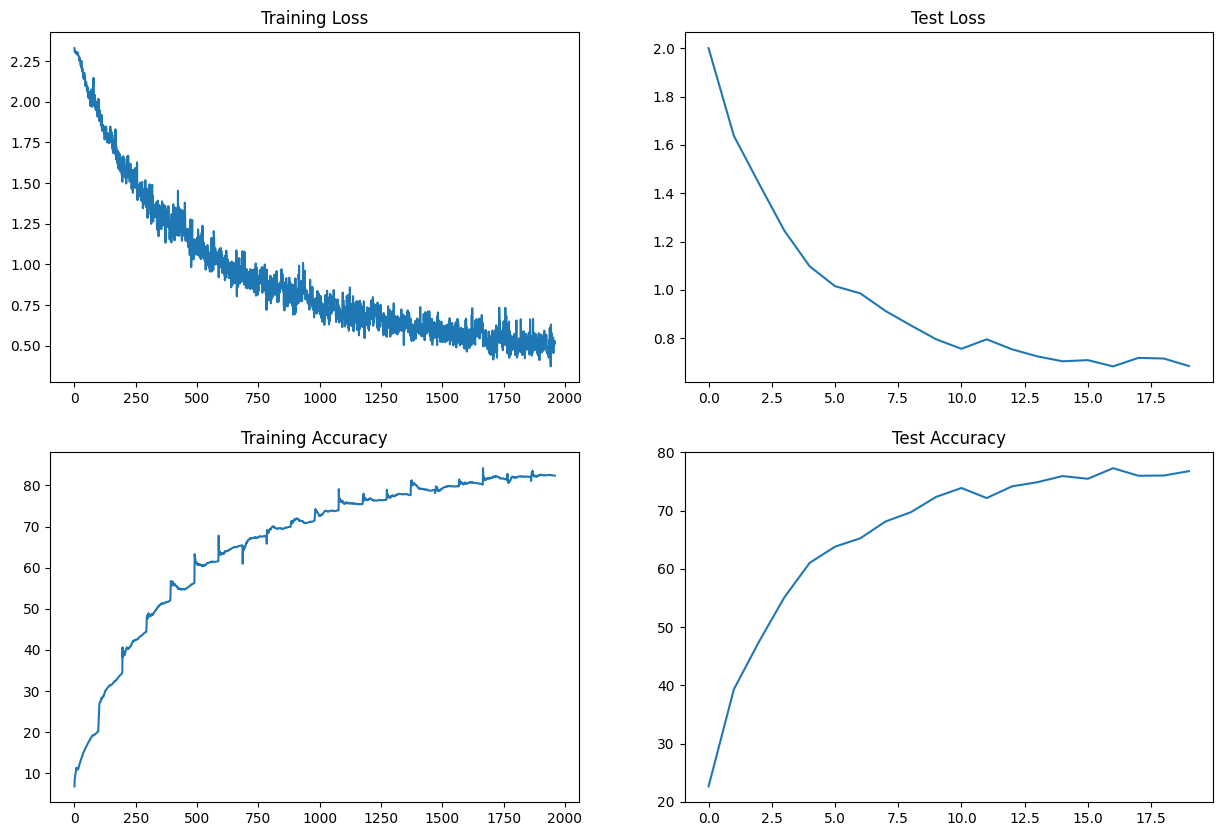

In [ ]:
train_losses_ln2 = [t.cpu().item() for t in train_losses_ln2]
display_model_stats(train_losses_ln2,
                    train_acc_ln2,
                    test_losses_ln2,
                    test_acc_ln2
                    )

#### Code Block - Model-2 - Basic structure -LN

**Target:**

- Basic Network Structure
- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Layer Normalization used
- Dropout of 0.01

**Results:**

- Parameters: 153.616K
- Best Train Accuracy: 82.38%
- Best Test Accuracy: 76.76% (20th Epoch)

**Analysis:**
- Model over fitting
- Heavy model with huge parameter count for the given task
- Over-fitting is comparably more in batch normalization. And accuracies and losses are better when batch normalization used.

### Model-2 - Group Normalization - Basic Structure


This model uses the Net_12 as the network architecture

In [ ]:
model_gn2 = Net_12('gn', 0.01, GROUP_SIZE=2).to(device)
summary(model_gn2, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 16, 28, 28]             512
         MaxPool2d-8           [-1, 16, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           4,608
        GroupNorm-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 64, 14, 14]          18,432
        GroupNorm-13           [-1, 64, 14, 14]             128
          Dropout-14           [-1, 64,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_gn2 = optim.SGD(model_gn2.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_gn2, train_acc_gn2 = train(model_gn2,
                                            device,
                                            train_loader,
                                            optimizer_gn2,
                                            epoch)
    test_losses_gn2, test_acc_gn2 = test(model_gn2,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.8681886196136475 Batch_id=97 Accuracy=22.95: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.8341, Accuracy: 3217/10000 (32.17%)

EPOCH: 1


Loss=1.509293794631958 Batch_id=97 Accuracy=36.96: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.5833, Accuracy: 4328/10000 (43.28%)

EPOCH: 2


Loss=1.4926501512527466 Batch_id=97 Accuracy=44.30: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.4185, Accuracy: 4805/10000 (48.05%)

EPOCH: 3


Loss=1.138403058052063 Batch_id=97 Accuracy=52.55: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]



Test set: Average loss: 1.2859, Accuracy: 5379/10000 (53.79%)

EPOCH: 4


Loss=1.170101284980774 Batch_id=97 Accuracy=57.54: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]



Test set: Average loss: 1.1650, Accuracy: 5830/10000 (58.30%)

EPOCH: 5


Loss=1.0114940404891968 Batch_id=97 Accuracy=60.29: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]



Test set: Average loss: 1.0979, Accuracy: 6065/10000 (60.65%)

EPOCH: 6


Loss=1.0023183822631836 Batch_id=97 Accuracy=63.94: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 1.1212, Accuracy: 6021/10000 (60.21%)

EPOCH: 7


Loss=0.9341697692871094 Batch_id=97 Accuracy=66.15: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.9599, Accuracy: 6615/10000 (66.15%)

EPOCH: 8


Loss=0.7858564257621765 Batch_id=97 Accuracy=68.82: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.9440, Accuracy: 6696/10000 (66.96%)

EPOCH: 9


Loss=0.8235492706298828 Batch_id=97 Accuracy=70.38: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.8116, Accuracy: 7118/10000 (71.18%)

EPOCH: 10


Loss=0.8427410125732422 Batch_id=97 Accuracy=73.11: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8238, Accuracy: 7097/10000 (70.97%)

EPOCH: 11


Loss=0.6830617189407349 Batch_id=97 Accuracy=73.24: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.8141, Accuracy: 7193/10000 (71.93%)

EPOCH: 12


Loss=0.7691763043403625 Batch_id=97 Accuracy=75.93: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.7470, Accuracy: 7377/10000 (73.77%)

EPOCH: 13


Loss=0.5905016660690308 Batch_id=97 Accuracy=76.61: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.7423, Accuracy: 7401/10000 (74.01%)

EPOCH: 14


Loss=0.6024712324142456 Batch_id=97 Accuracy=77.80: 100%|██████████| 98/98 [00:30<00:00,  3.27it/s]



Test set: Average loss: 0.7222, Accuracy: 7537/10000 (75.37%)

EPOCH: 15


Loss=0.6415460705757141 Batch_id=97 Accuracy=79.35: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 0.6833, Accuracy: 7658/10000 (76.58%)

EPOCH: 16


Loss=0.6285033226013184 Batch_id=97 Accuracy=79.83: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.7202, Accuracy: 7559/10000 (75.59%)

EPOCH: 17


Loss=0.5141425132751465 Batch_id=97 Accuracy=80.76: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.6774, Accuracy: 7666/10000 (76.66%)

EPOCH: 18


Loss=0.4202137589454651 Batch_id=97 Accuracy=81.98: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.6966, Accuracy: 7643/10000 (76.43%)

EPOCH: 19


Loss=0.5812493562698364 Batch_id=97 Accuracy=82.83: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.6792, Accuracy: 7757/10000 (77.57%)



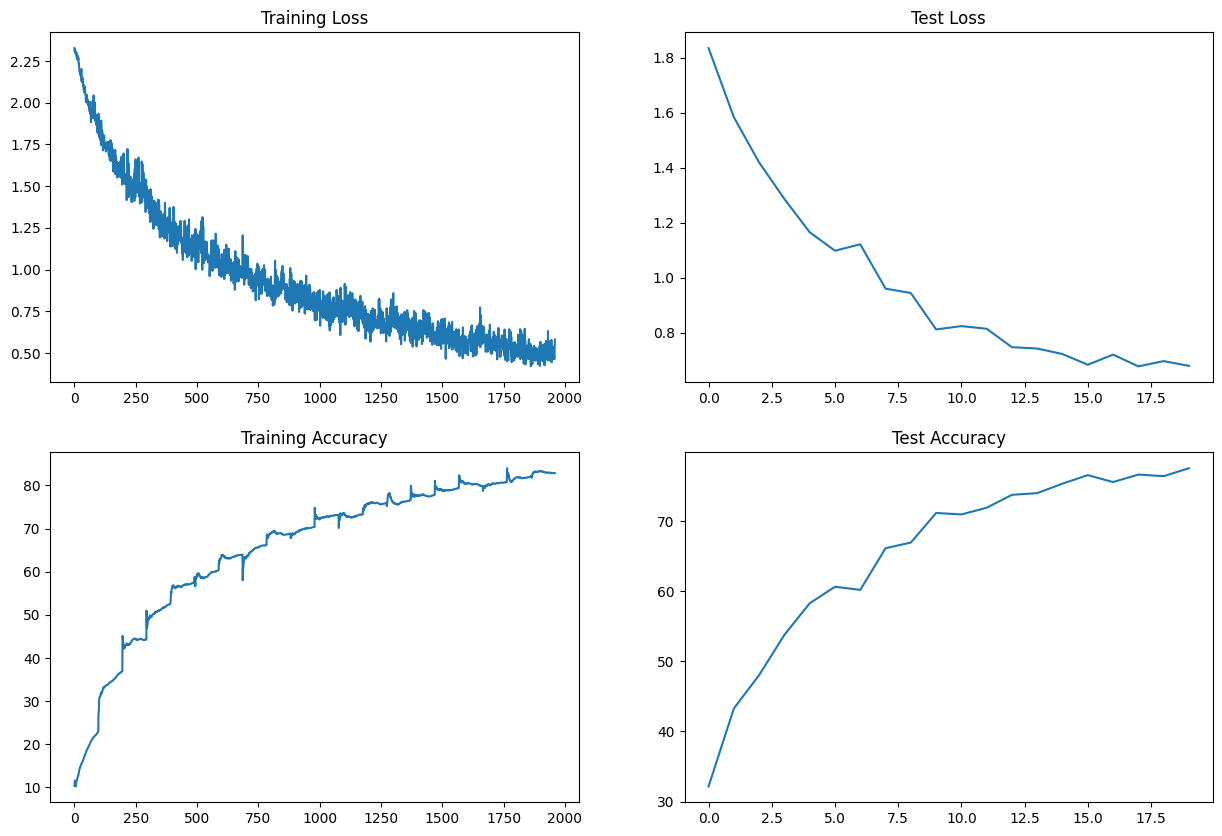

In [ ]:
train_losses_gn2 = [t.cpu().item() for t in train_losses_gn2]
display_model_stats(train_losses_gn2,
                    train_acc_gn2,
                    test_losses_gn2,
                    test_acc_gn2
                    )

#### Code Block - Model-2 - Basic structure -GN

**Target:**

- Basic Network Structure
- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Group Normalization used
- Dropout of 0.01

**Results:**

- Parameters: 153.616K
- Best Train Accuracy: 82.83%
- Best Test Accuracy: 77.57% (20th Epoch)

**Analysis:**
- Model over fitting
- Heavy model with huge parameter count for the given task
- Group Normalization accuracies/losses are almost comparable with those of Layer Normalization

### Model-3 - Batch Normalization - Reduced Capacity


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_bn3 = Net_13('bn', 0.01).to(device)
summary(model_bn3, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
      BatchNorm2d-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
      BatchNorm2d-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_bn3 = optim.SGD(model_bn3.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_bn3, train_acc_bn3 = train(model_bn3,
                                            device,
                                            train_loader,
                                            optimizer_bn3,
                                            epoch)
    test_losses_bn3, test_acc_bn3 = test(model_bn3,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.7567793130874634 Batch_id=97 Accuracy=26.18: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 1.7491, Accuracy: 3645/10000 (36.45%)

EPOCH: 1


Loss=1.5420132875442505 Batch_id=97 Accuracy=40.43: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.5027, Accuracy: 4335/10000 (43.35%)

EPOCH: 2


Loss=1.3693106174468994 Batch_id=97 Accuracy=49.55: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 1.3482, Accuracy: 5103/10000 (51.03%)

EPOCH: 3


Loss=1.1001073122024536 Batch_id=97 Accuracy=56.29: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.3381, Accuracy: 5224/10000 (52.24%)

EPOCH: 4


Loss=1.1480870246887207 Batch_id=97 Accuracy=61.11: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 1.1777, Accuracy: 5724/10000 (57.24%)

EPOCH: 5


Loss=1.082416296005249 Batch_id=97 Accuracy=63.55: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 1.0246, Accuracy: 6310/10000 (63.10%)

EPOCH: 6


Loss=1.0006687641143799 Batch_id=97 Accuracy=65.86: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.0401, Accuracy: 6327/10000 (63.27%)

EPOCH: 7


Loss=1.0233486890792847 Batch_id=97 Accuracy=67.60: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.0634, Accuracy: 6215/10000 (62.15%)

EPOCH: 8


Loss=0.8678257465362549 Batch_id=97 Accuracy=68.93: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.9524, Accuracy: 6657/10000 (66.57%)

EPOCH: 9


Loss=0.8355416059494019 Batch_id=97 Accuracy=70.73: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.9520, Accuracy: 6619/10000 (66.19%)

EPOCH: 10


Loss=0.7823258638381958 Batch_id=97 Accuracy=71.83: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.9208, Accuracy: 6745/10000 (67.45%)

EPOCH: 11


Loss=0.8777762055397034 Batch_id=97 Accuracy=72.74: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8764, Accuracy: 6863/10000 (68.63%)

EPOCH: 12


Loss=0.7411136627197266 Batch_id=97 Accuracy=73.53: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.9204, Accuracy: 6813/10000 (68.13%)

EPOCH: 13


Loss=0.6162209510803223 Batch_id=97 Accuracy=74.50: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.8898, Accuracy: 6967/10000 (69.67%)

EPOCH: 14


Loss=0.7709910869598389 Batch_id=97 Accuracy=75.32: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.9053, Accuracy: 6828/10000 (68.28%)

EPOCH: 15


Loss=0.6894958019256592 Batch_id=97 Accuracy=76.36: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.8118, Accuracy: 7176/10000 (71.76%)

EPOCH: 16


Loss=0.6572989225387573 Batch_id=97 Accuracy=76.52: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 0.8537, Accuracy: 7098/10000 (70.98%)

EPOCH: 17


Loss=0.7012230157852173 Batch_id=97 Accuracy=77.08: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.7889, Accuracy: 7255/10000 (72.55%)

EPOCH: 18


Loss=0.6003323197364807 Batch_id=97 Accuracy=77.67: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8362, Accuracy: 7197/10000 (71.97%)

EPOCH: 19


Loss=0.5848706364631653 Batch_id=97 Accuracy=77.87: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.7912, Accuracy: 7255/10000 (72.55%)



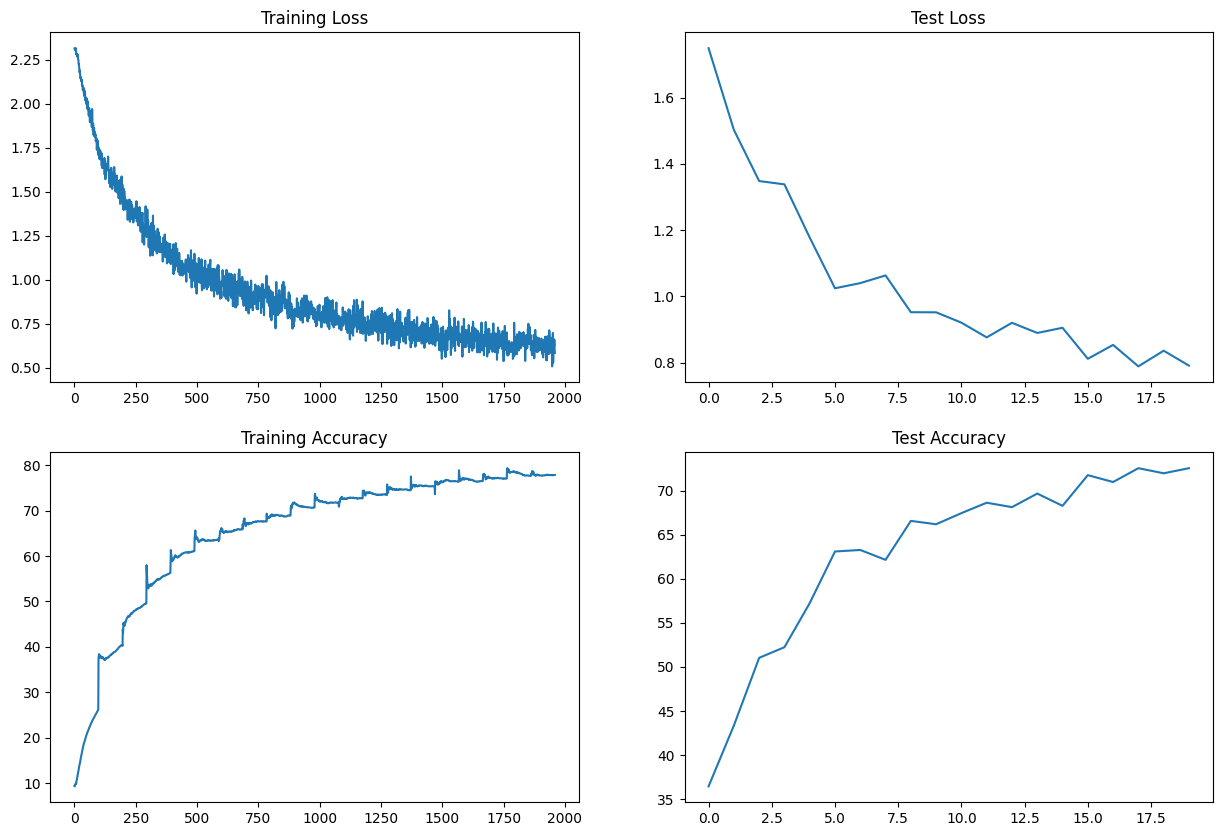

In [ ]:
train_losses_bn3 = [t.cpu().item() for t in train_losses_bn3]
display_model_stats(train_losses_bn3,
                    train_acc_bn3,
                    test_losses_bn3,
                    test_acc_bn3
                    )

In [ ]:
bn3_incorrect_pred = get_incorrect_test_predictions(model_bn3,
                                                    device,
                                                    test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

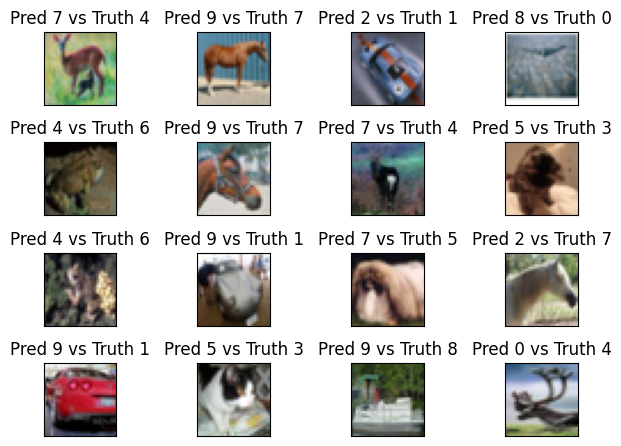

In [ ]:
show_cifar10_incorrect_predictions(bn3_incorrect_pred, classes)

### Model-3 - Layer Normalization - Reduced Capacity


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_ln3 = Net_13('ln', 0.01).to(device)
summary(model_ln3, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
        GroupNorm-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_ln3 = optim.SGD(model_ln3.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_ln3, train_acc_ln3 = train(model_ln3,
                                            device,
                                            train_loader,
                                            optimizer_ln3,
                                            epoch)
    test_losses_ln3, test_acc_ln3 = test(model_ln3, device, test_loader)

EPOCH: 0


Loss=1.9714303016662598 Batch_id=97 Accuracy=18.61: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.9691, Accuracy: 2317/10000 (23.17%)

EPOCH: 1


Loss=1.774838924407959 Batch_id=97 Accuracy=30.15: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.7456, Accuracy: 3447/10000 (34.47%)

EPOCH: 2


Loss=1.5642505884170532 Batch_id=97 Accuracy=38.09: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.5329, Accuracy: 4357/10000 (43.57%)

EPOCH: 3


Loss=1.6236534118652344 Batch_id=97 Accuracy=44.86: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.4420, Accuracy: 4782/10000 (47.82%)

EPOCH: 4


Loss=1.2558504343032837 Batch_id=97 Accuracy=48.92: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.3028, Accuracy: 5309/10000 (53.09%)

EPOCH: 5


Loss=1.323778748512268 Batch_id=97 Accuracy=53.48: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.2263, Accuracy: 5596/10000 (55.96%)

EPOCH: 6


Loss=1.195761799812317 Batch_id=97 Accuracy=55.33: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.1712, Accuracy: 5792/10000 (57.92%)

EPOCH: 7


Loss=1.2100785970687866 Batch_id=97 Accuracy=57.57: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.2232, Accuracy: 5621/10000 (56.21%)

EPOCH: 8


Loss=1.047476053237915 Batch_id=97 Accuracy=59.28: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 1.1471, Accuracy: 5848/10000 (58.48%)

EPOCH: 9


Loss=1.1521902084350586 Batch_id=97 Accuracy=61.08: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.0814, Accuracy: 6074/10000 (60.74%)

EPOCH: 10


Loss=1.0944912433624268 Batch_id=97 Accuracy=62.26: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.0810, Accuracy: 6192/10000 (61.92%)

EPOCH: 11


Loss=1.0187593698501587 Batch_id=97 Accuracy=62.34: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 1.0333, Accuracy: 6307/10000 (63.07%)

EPOCH: 12


Loss=0.9339872002601624 Batch_id=97 Accuracy=63.80: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]



Test set: Average loss: 1.0654, Accuracy: 6187/10000 (61.87%)

EPOCH: 13


Loss=0.9889836311340332 Batch_id=97 Accuracy=64.93: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.0844, Accuracy: 6177/10000 (61.77%)

EPOCH: 14


Loss=0.9161666035652161 Batch_id=97 Accuracy=65.94: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 0.9725, Accuracy: 6551/10000 (65.51%)

EPOCH: 15


Loss=0.9924222826957703 Batch_id=97 Accuracy=66.60: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.0137, Accuracy: 6379/10000 (63.79%)

EPOCH: 16


Loss=0.9413889646530151 Batch_id=97 Accuracy=67.66: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.9784, Accuracy: 6536/10000 (65.36%)

EPOCH: 17


Loss=0.9417235851287842 Batch_id=97 Accuracy=68.28: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.9529, Accuracy: 6671/10000 (66.71%)

EPOCH: 18


Loss=0.8376888036727905 Batch_id=97 Accuracy=68.44: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.9454, Accuracy: 6749/10000 (67.49%)

EPOCH: 19


Loss=0.9328418970108032 Batch_id=97 Accuracy=69.54: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 0.9331, Accuracy: 6678/10000 (66.78%)



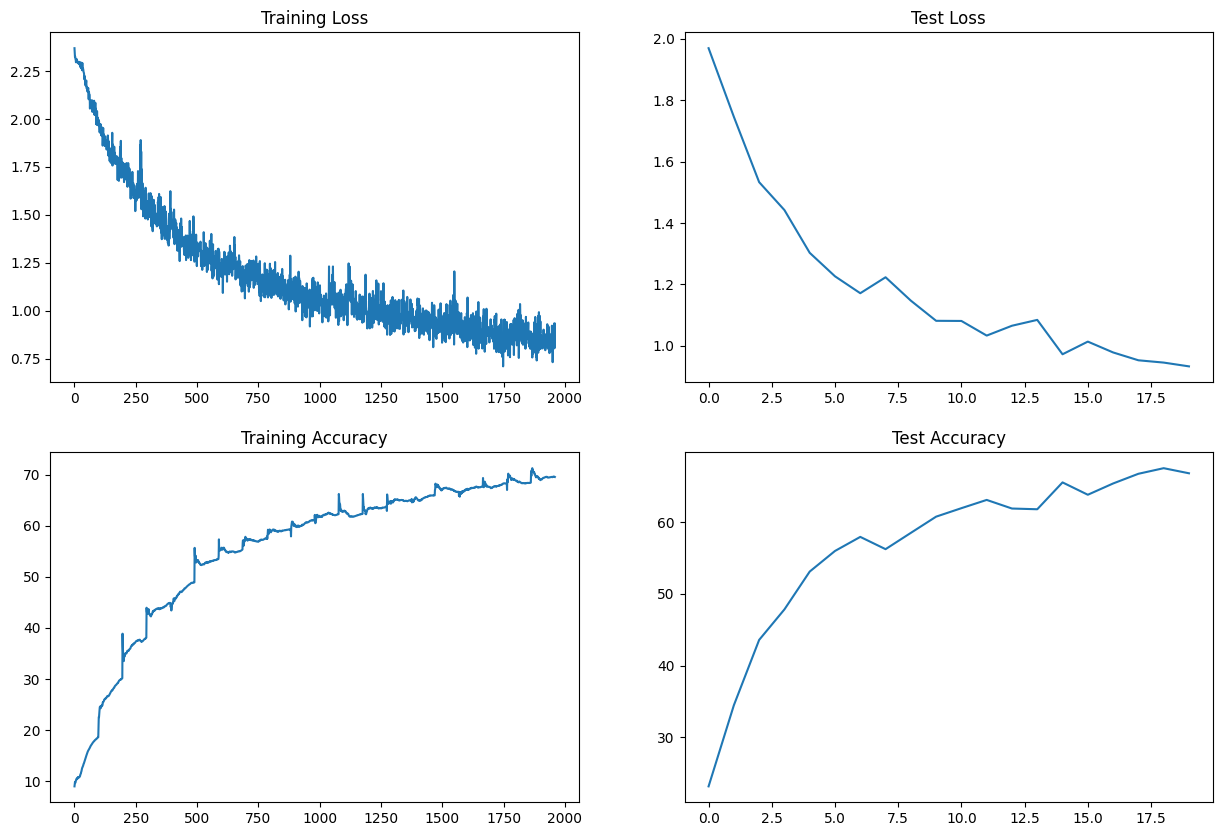

In [ ]:
train_losses_ln3 = [t.cpu().item() for t in train_losses_ln3]
display_model_stats(train_losses_ln3,
                    train_acc_ln3,
                    test_losses_ln3,
                    test_acc_ln3
                    )

In [ ]:
ln3_incorrect_pred = get_incorrect_test_predictions(model_ln3,
                                                    device,
                                                    test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

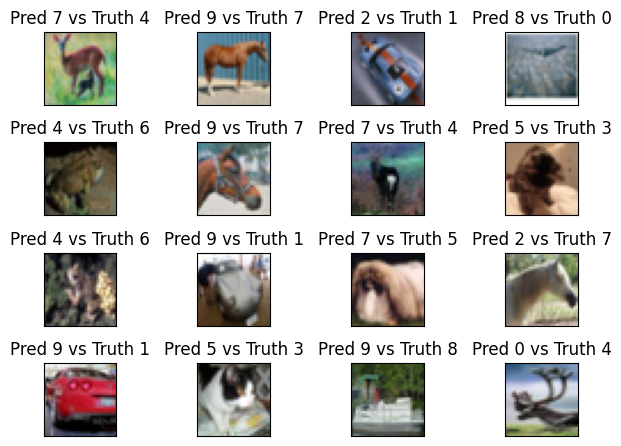

In [ ]:
show_cifar10_incorrect_predictions(ln3_incorrect_pred, classes)

### Model-3 - Group Normalization - Reduced Capacity


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_gn3 = Net_13('gn', 0.01).to(device)
summary(model_gn3, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
        GroupNorm-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_gn3 = optim.SGD(model_gn3.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_gn3, train_acc_gn3 = train(model_gn3,
                                            device,
                                            train_loader,
                                            optimizer_gn3,
                                            epoch)
    test_losses_gn3, test_acc_gn3 = test(model_gn3, device, test_loader)

EPOCH: 0


Loss=1.9893656969070435 Batch_id=97 Accuracy=21.05: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.9987, Accuracy: 2478/10000 (24.78%)

EPOCH: 1


Loss=1.8661768436431885 Batch_id=97 Accuracy=28.97: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.8762, Accuracy: 3004/10000 (30.04%)

EPOCH: 2


Loss=1.6825236082077026 Batch_id=97 Accuracy=34.59: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.7201, Accuracy: 3717/10000 (37.17%)

EPOCH: 3


Loss=1.5883779525756836 Batch_id=97 Accuracy=38.45: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.6046, Accuracy: 4118/10000 (41.18%)

EPOCH: 4


Loss=1.520047903060913 Batch_id=97 Accuracy=42.59: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.5614, Accuracy: 4362/10000 (43.62%)

EPOCH: 5


Loss=1.3857160806655884 Batch_id=97 Accuracy=47.42: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.3869, Accuracy: 4962/10000 (49.62%)

EPOCH: 6


Loss=1.335597038269043 Batch_id=97 Accuracy=50.64: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.2637, Accuracy: 5385/10000 (53.85%)

EPOCH: 7


Loss=1.2556939125061035 Batch_id=97 Accuracy=53.89: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



Test set: Average loss: 1.2498, Accuracy: 5431/10000 (54.31%)

EPOCH: 8


Loss=1.2309610843658447 Batch_id=97 Accuracy=55.34: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 1.2035, Accuracy: 5617/10000 (56.17%)

EPOCH: 9


Loss=1.0189528465270996 Batch_id=97 Accuracy=57.67: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.1084, Accuracy: 5985/10000 (59.85%)

EPOCH: 10


Loss=1.0775896310806274 Batch_id=97 Accuracy=59.03: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 1.2505, Accuracy: 5525/10000 (55.25%)

EPOCH: 11


Loss=1.0482910871505737 Batch_id=97 Accuracy=61.07: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 1.0465, Accuracy: 6246/10000 (62.46%)

EPOCH: 12


Loss=1.0070232152938843 Batch_id=97 Accuracy=61.92: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 1.0264, Accuracy: 6297/10000 (62.97%)

EPOCH: 13


Loss=1.0560930967330933 Batch_id=97 Accuracy=64.45: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.0613, Accuracy: 6299/10000 (62.99%)

EPOCH: 14


Loss=0.9939776062965393 Batch_id=97 Accuracy=64.82: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 1.0224, Accuracy: 6346/10000 (63.46%)

EPOCH: 15


Loss=0.9945523142814636 Batch_id=97 Accuracy=65.52: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.9842, Accuracy: 6509/10000 (65.09%)

EPOCH: 16


Loss=1.0421334505081177 Batch_id=97 Accuracy=66.48: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.9433, Accuracy: 6673/10000 (66.73%)

EPOCH: 17


Loss=0.9041515588760376 Batch_id=97 Accuracy=68.15: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.9873, Accuracy: 6533/10000 (65.33%)

EPOCH: 18


Loss=0.8559053540229797 Batch_id=97 Accuracy=68.49: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.9182, Accuracy: 6746/10000 (67.46%)

EPOCH: 19


Loss=0.8201276659965515 Batch_id=97 Accuracy=68.88: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 0.9011, Accuracy: 6877/10000 (68.77%)



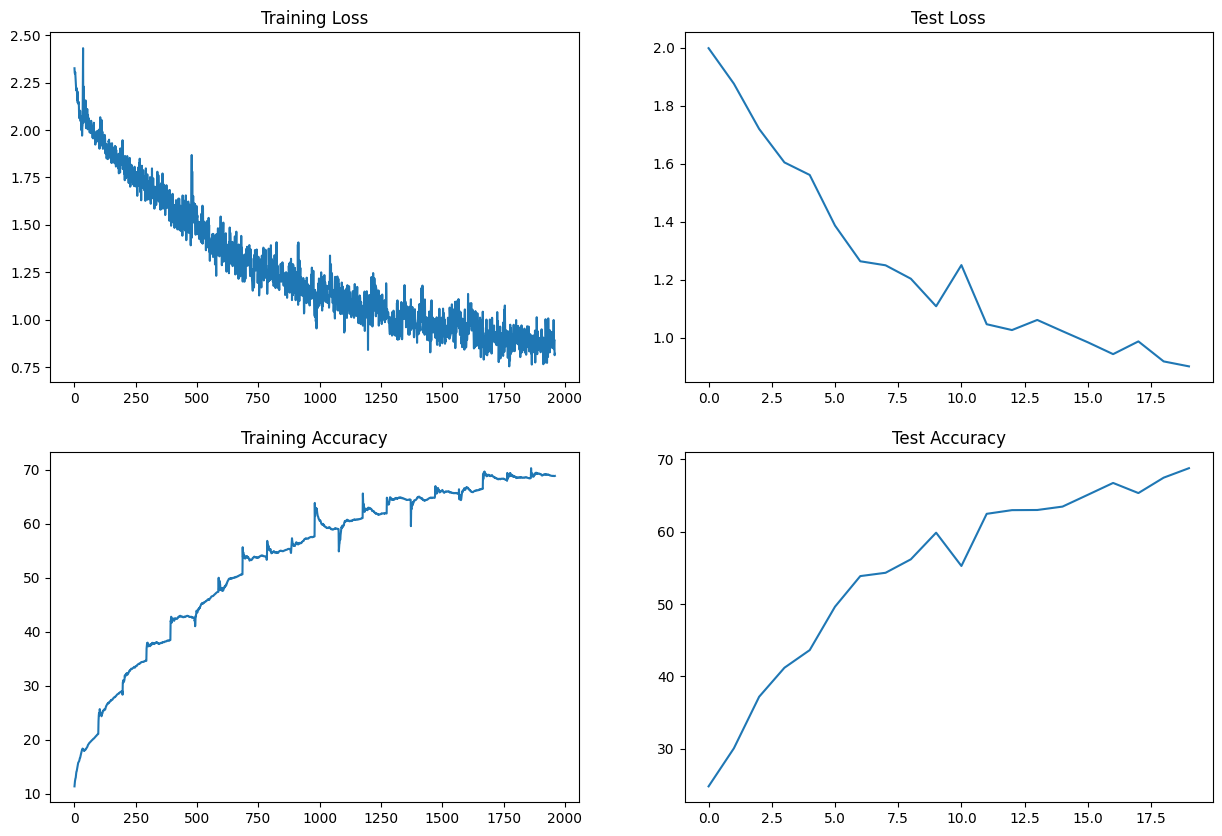

In [ ]:
train_losses_gn3 = [t.cpu().item() for t in train_losses_gn3]
display_model_stats(train_losses_gn3,
                    train_acc_gn3,
                    test_losses_gn3,
                    test_acc_gn3
                    )

In [ ]:
gn3_incorrect_pred = get_incorrect_test_predictions(model_gn3,
                                                    device,
                                                    test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

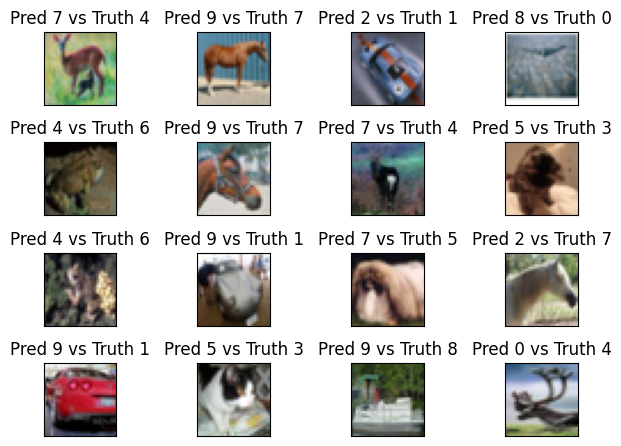

In [ ]:
show_cifar10_incorrect_predictions(gn3_incorrect_pred, classes)

### Model-4 - Batch Normalization - Optimal Dropout, LR


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_bn4 = Net_13('bn', 0.05).to(device)
summary(model_bn4, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
      BatchNorm2d-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
      BatchNorm2d-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_bn4 = optim.SGD(model_bn4.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_bn4, train_acc_bn4 = train(model_bn4,
                                            device,
                                            train_loader,
                                            optimizer_bn4,
                                            epoch)
    test_losses_bn4, test_acc_bn4 = test(model_bn4, device, test_loader)

EPOCH: 0


Loss=1.3919293880462646 Batch_id=97 Accuracy=34.27: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



Test set: Average loss: 1.6858, Accuracy: 3741/10000 (37.41%)

EPOCH: 1


Loss=1.1523325443267822 Batch_id=97 Accuracy=51.63: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 1.3560, Accuracy: 5106/10000 (51.06%)

EPOCH: 2


Loss=1.1028944253921509 Batch_id=97 Accuracy=59.78: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]



Test set: Average loss: 1.1061, Accuracy: 6078/10000 (60.78%)

EPOCH: 3


Loss=0.9291892051696777 Batch_id=97 Accuracy=63.69: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.0351, Accuracy: 6345/10000 (63.45%)

EPOCH: 4


Loss=0.8736948370933533 Batch_id=97 Accuracy=67.06: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.0161, Accuracy: 6437/10000 (64.37%)

EPOCH: 5


Loss=0.8668160438537598 Batch_id=97 Accuracy=69.19: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.0349, Accuracy: 6512/10000 (65.12%)

EPOCH: 6


Loss=0.8416482210159302 Batch_id=97 Accuracy=70.96: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.9339, Accuracy: 6733/10000 (67.33%)

EPOCH: 7


Loss=0.761058509349823 Batch_id=97 Accuracy=71.86: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 0.8702, Accuracy: 6954/10000 (69.54%)

EPOCH: 8


Loss=0.7308637499809265 Batch_id=97 Accuracy=72.85: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.8194, Accuracy: 7177/10000 (71.77%)

EPOCH: 9


Loss=0.7911442518234253 Batch_id=97 Accuracy=73.83: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7962, Accuracy: 7214/10000 (72.14%)

EPOCH: 10


Loss=0.695542573928833 Batch_id=97 Accuracy=74.19: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.9081, Accuracy: 6895/10000 (68.95%)

EPOCH: 11


Loss=0.6820583343505859 Batch_id=97 Accuracy=74.76: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.8393, Accuracy: 7098/10000 (70.98%)

EPOCH: 12


Loss=0.7840954065322876 Batch_id=97 Accuracy=75.24: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.7978, Accuracy: 7212/10000 (72.12%)

EPOCH: 13


Loss=0.6484341025352478 Batch_id=97 Accuracy=75.84: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.7328, Accuracy: 7534/10000 (75.34%)

EPOCH: 14


Loss=0.7347418069839478 Batch_id=97 Accuracy=76.12: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]



Test set: Average loss: 0.7868, Accuracy: 7305/10000 (73.05%)

EPOCH: 15


Loss=0.687673032283783 Batch_id=97 Accuracy=76.73: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.7268, Accuracy: 7481/10000 (74.81%)

EPOCH: 16


Loss=0.5699601173400879 Batch_id=97 Accuracy=76.96: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.7634, Accuracy: 7428/10000 (74.28%)

EPOCH: 17


Loss=0.6687838435173035 Batch_id=97 Accuracy=77.10: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.7602, Accuracy: 7310/10000 (73.10%)

EPOCH: 18


Loss=0.7590361833572388 Batch_id=97 Accuracy=77.53: 100%|██████████| 98/98 [00:30<00:00,  3.27it/s]



Test set: Average loss: 0.7340, Accuracy: 7473/10000 (74.73%)

EPOCH: 19


Loss=0.6233102083206177 Batch_id=97 Accuracy=77.53: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.7565, Accuracy: 7393/10000 (73.93%)



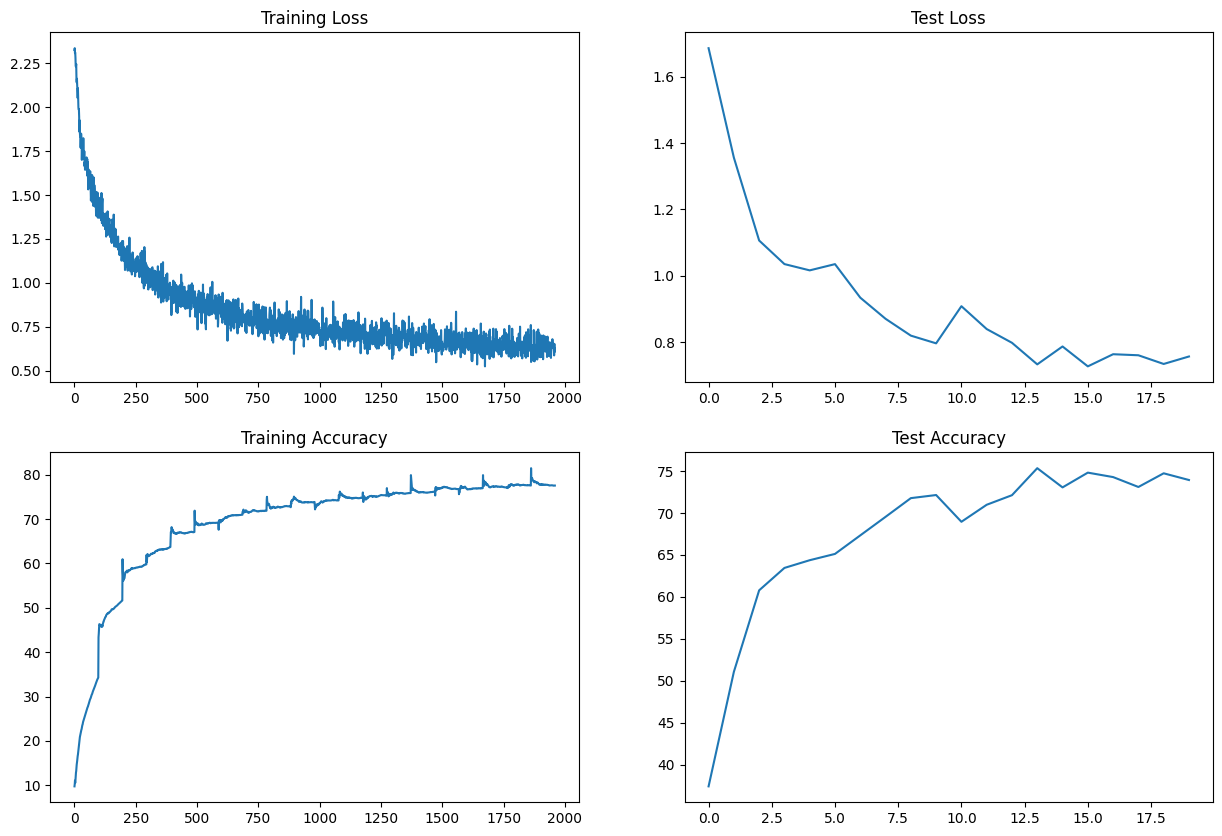

In [ ]:
train_losses_bn4 = [t.cpu().item() for t in train_losses_bn4]
display_model_stats(train_losses_bn4,
                    train_acc_bn4,
                    test_losses_bn4,
                    test_acc_bn4
                    )

In [ ]:
bn4_incorrect_pred = get_incorrect_test_predictions(model_bn4, device, test_loader) # Predicted vs Actual


0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

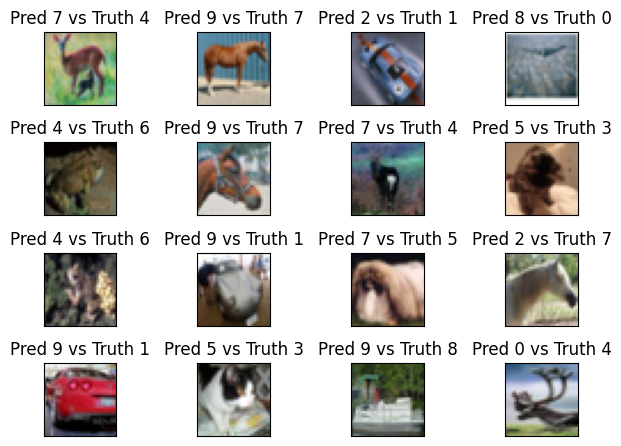

In [ ]:
show_cifar10_incorrect_predictions(bn4_incorrect_pred, classes)

#### Code Block - Model-4 - Batch Normalization - Optimal DropOut, LR

**Target:**

- Batch Normalization used
- Optimal Dropout found as 0.05 and learning rate 0.1 used

**Results:**

- Parameters: 36.336K
- Best Train Accuracy: 77.53%
- Best Test Accuracy: 75.34% (1th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is slightly more with batch normalization technique
- Accuracies and losses are comparatively much slightly higher with batch normalization
- Need to check if layer additions can improve accuracy

### Model-4 - Layer Normalization - Optimal Dropout, LR


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_ln4 = Net_13('ln', 0.05).to(device)
summary(model_ln4, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
        GroupNorm-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_ln4 = optim.SGD(model_ln4.parameters(), lr=0.05, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_ln4, train_acc_ln4 = train(model_ln4,
                                            device,
                                            train_loader,
                                            optimizer_ln4,
                                            epoch)
    test_losses_ln4, test_acc_ln4 = test(model_ln4,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=2.007999897003174 Batch_id=97 Accuracy=20.40: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.9388, Accuracy: 2849/10000 (28.49%)

EPOCH: 1


Loss=1.7882779836654663 Batch_id=97 Accuracy=29.93: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.8072, Accuracy: 3378/10000 (33.78%)

EPOCH: 2


Loss=1.7800554037094116 Batch_id=97 Accuracy=33.53: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.6909, Accuracy: 3769/10000 (37.69%)

EPOCH: 3


Loss=1.663709044456482 Batch_id=97 Accuracy=37.24: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.6246, Accuracy: 3971/10000 (39.71%)

EPOCH: 4


Loss=1.6140289306640625 Batch_id=97 Accuracy=40.35: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.5055, Accuracy: 4449/10000 (44.49%)

EPOCH: 5


Loss=1.5384935140609741 Batch_id=97 Accuracy=43.66: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.5386, Accuracy: 4338/10000 (43.38%)

EPOCH: 6


Loss=1.4710171222686768 Batch_id=97 Accuracy=46.20: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 1.4142, Accuracy: 4807/10000 (48.07%)

EPOCH: 7


Loss=1.3685674667358398 Batch_id=97 Accuracy=49.05: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.4044, Accuracy: 5041/10000 (50.41%)

EPOCH: 8


Loss=1.3486573696136475 Batch_id=97 Accuracy=51.42: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.5267, Accuracy: 4547/10000 (45.47%)

EPOCH: 9


Loss=1.2770525217056274 Batch_id=97 Accuracy=53.36: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 1.1980, Accuracy: 5630/10000 (56.30%)

EPOCH: 10


Loss=1.1506789922714233 Batch_id=97 Accuracy=55.99: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 1.2103, Accuracy: 5645/10000 (56.45%)

EPOCH: 11


Loss=1.1380263566970825 Batch_id=97 Accuracy=57.10: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.2129, Accuracy: 5597/10000 (55.97%)

EPOCH: 12


Loss=1.254801630973816 Batch_id=97 Accuracy=57.71: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.1389, Accuracy: 5875/10000 (58.75%)

EPOCH: 13


Loss=1.1222833395004272 Batch_id=97 Accuracy=59.08: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 1.1127, Accuracy: 6022/10000 (60.22%)

EPOCH: 14


Loss=1.1222623586654663 Batch_id=97 Accuracy=60.71: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.0983, Accuracy: 6041/10000 (60.41%)

EPOCH: 15


Loss=1.0819847583770752 Batch_id=97 Accuracy=61.02: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]



Test set: Average loss: 1.0614, Accuracy: 6250/10000 (62.50%)

EPOCH: 16


Loss=1.1043164730072021 Batch_id=97 Accuracy=61.89: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.2434, Accuracy: 5578/10000 (55.78%)

EPOCH: 17


Loss=0.9984850883483887 Batch_id=97 Accuracy=63.68: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.0182, Accuracy: 6429/10000 (64.29%)

EPOCH: 18


Loss=1.0579116344451904 Batch_id=97 Accuracy=63.39: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.9995, Accuracy: 6395/10000 (63.95%)

EPOCH: 19


Loss=0.9546899199485779 Batch_id=97 Accuracy=64.53: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.1132, Accuracy: 6076/10000 (60.76%)



In [ ]:
train_losses_ln4 = [t.cpu().item() for t in train_losses_ln4]

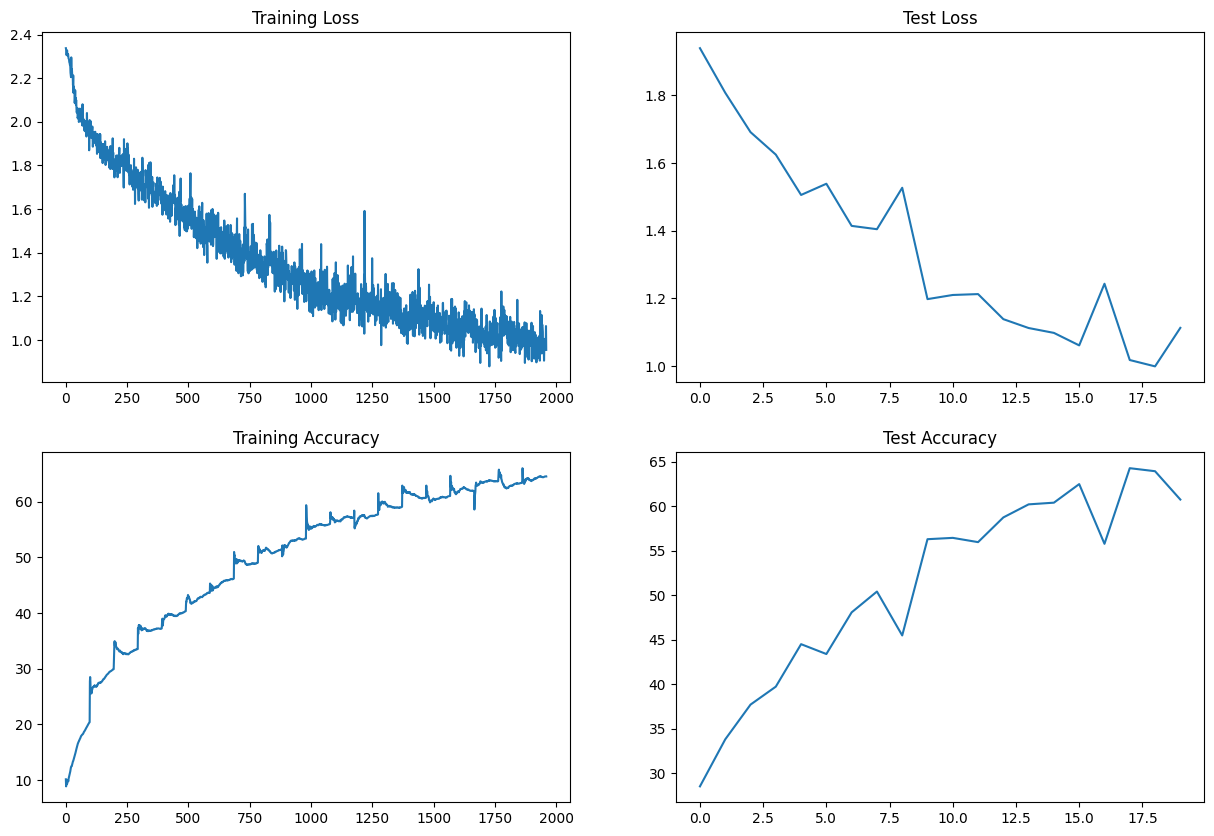

In [ ]:
display_model_stats(train_losses_ln4,
                    train_acc_ln4,
                    test_losses_ln4,
                    test_acc_ln4)

In [ ]:
ln4_incorrect_pred = get_incorrect_test_predictions(model_ln4, device, test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

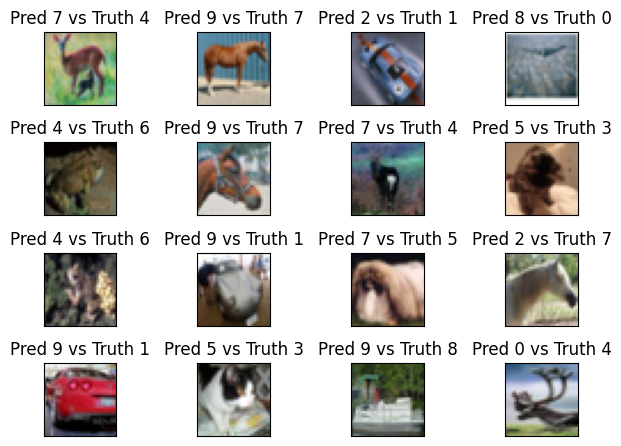

In [ ]:
show_cifar10_incorrect_predictions(ln4_incorrect_pred, classes)

#### Code Block - Model-4 - Layer Normalization - Optimal DropOut, LR

**Target:**

- Layer Normalization used
- Optimal Dropout found as 0.01 and learning rate 0.01 used

**Results:**

- Parameters: 36.336K
- Best Train Accuracy: 64.53%
- Best Test Accuracy: 64.29% (17th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is slightly lesser compared to that with layer normalization techniques
- Accuracies and losses are comparatively much lower with layer normalization
- Learning pace is much slower compared to that with group and batch normalizations
- Need to check if layer additions can improve accuracy

### Model-4 - Group Normalization - Optimal Dropout, LR


This model uses the Net_13 as the network architecture which reduces the parameter count

In [ ]:
model_gn4 = Net_13('gn', 0.01, GROUP_SIZE=2).to(device)
summary(model_gn4, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 16, 14, 14]           1,152
        GroupNorm-10           [-1, 16, 14, 14]              32
          Dropout-11           [-1, 16, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           4,608
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_gn4 = optim.SGD(model_gn4.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_gn4, train_acc_gn4 = train(model_gn4,
                                            device,
                                            train_loader,
                                            optimizer_gn4,
                                            epoch)
    test_losses_gn4, test_acc_gn4 = test(model_gn4,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.883361577987671 Batch_id=97 Accuracy=23.96: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.8754, Accuracy: 3021/10000 (30.21%)

EPOCH: 1


Loss=1.732277274131775 Batch_id=97 Accuracy=31.51: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]



Test set: Average loss: 1.7403, Accuracy: 3645/10000 (36.45%)

EPOCH: 2


Loss=1.754030704498291 Batch_id=97 Accuracy=36.73: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.5952, Accuracy: 4154/10000 (41.54%)

EPOCH: 3


Loss=1.6311562061309814 Batch_id=97 Accuracy=40.77: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.5340, Accuracy: 4414/10000 (44.14%)

EPOCH: 4


Loss=1.4334287643432617 Batch_id=97 Accuracy=45.63: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.4135, Accuracy: 4785/10000 (47.85%)

EPOCH: 5


Loss=1.2993829250335693 Batch_id=97 Accuracy=49.33: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.3984, Accuracy: 5011/10000 (50.11%)

EPOCH: 6


Loss=1.2113564014434814 Batch_id=97 Accuracy=53.93: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 1.2312, Accuracy: 5505/10000 (55.05%)

EPOCH: 7


Loss=1.1345112323760986 Batch_id=97 Accuracy=56.22: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.1471, Accuracy: 5910/10000 (59.10%)

EPOCH: 8


Loss=1.0112061500549316 Batch_id=97 Accuracy=58.50: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.1321, Accuracy: 5895/10000 (58.95%)

EPOCH: 9


Loss=1.0441441535949707 Batch_id=97 Accuracy=60.70: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.1893, Accuracy: 5759/10000 (57.59%)

EPOCH: 10


Loss=0.9983330965042114 Batch_id=97 Accuracy=60.92: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.0685, Accuracy: 6233/10000 (62.33%)

EPOCH: 11


Loss=0.933458685874939 Batch_id=97 Accuracy=64.34: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 1.0081, Accuracy: 6417/10000 (64.17%)

EPOCH: 12


Loss=1.1244776248931885 Batch_id=97 Accuracy=64.95: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.2364, Accuracy: 5781/10000 (57.81%)

EPOCH: 13


Loss=0.970704197883606 Batch_id=97 Accuracy=65.02: 100%|██████████| 98/98 [00:29<00:00,  3.30it/s]



Test set: Average loss: 0.9822, Accuracy: 6554/10000 (65.54%)

EPOCH: 14


Loss=0.9293187260627747 Batch_id=97 Accuracy=66.95: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.9788, Accuracy: 6465/10000 (64.65%)

EPOCH: 15


Loss=0.9082130193710327 Batch_id=97 Accuracy=68.47: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.9411, Accuracy: 6653/10000 (66.53%)

EPOCH: 16


Loss=0.764946699142456 Batch_id=97 Accuracy=68.90: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 0.9065, Accuracy: 6796/10000 (67.96%)

EPOCH: 17


Loss=0.8418594598770142 Batch_id=97 Accuracy=70.26: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 0.8663, Accuracy: 6921/10000 (69.21%)

EPOCH: 18


Loss=0.8458878397941589 Batch_id=97 Accuracy=70.68: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.8454, Accuracy: 6989/10000 (69.89%)

EPOCH: 19


Loss=0.7882617712020874 Batch_id=97 Accuracy=71.48: 100%|██████████| 98/98 [00:29<00:00,  3.32it/s]



Test set: Average loss: 0.8849, Accuracy: 6914/10000 (69.14%)



In [ ]:
train_losses_gn4 = [t.cpu().item() for t in train_losses_gn4]

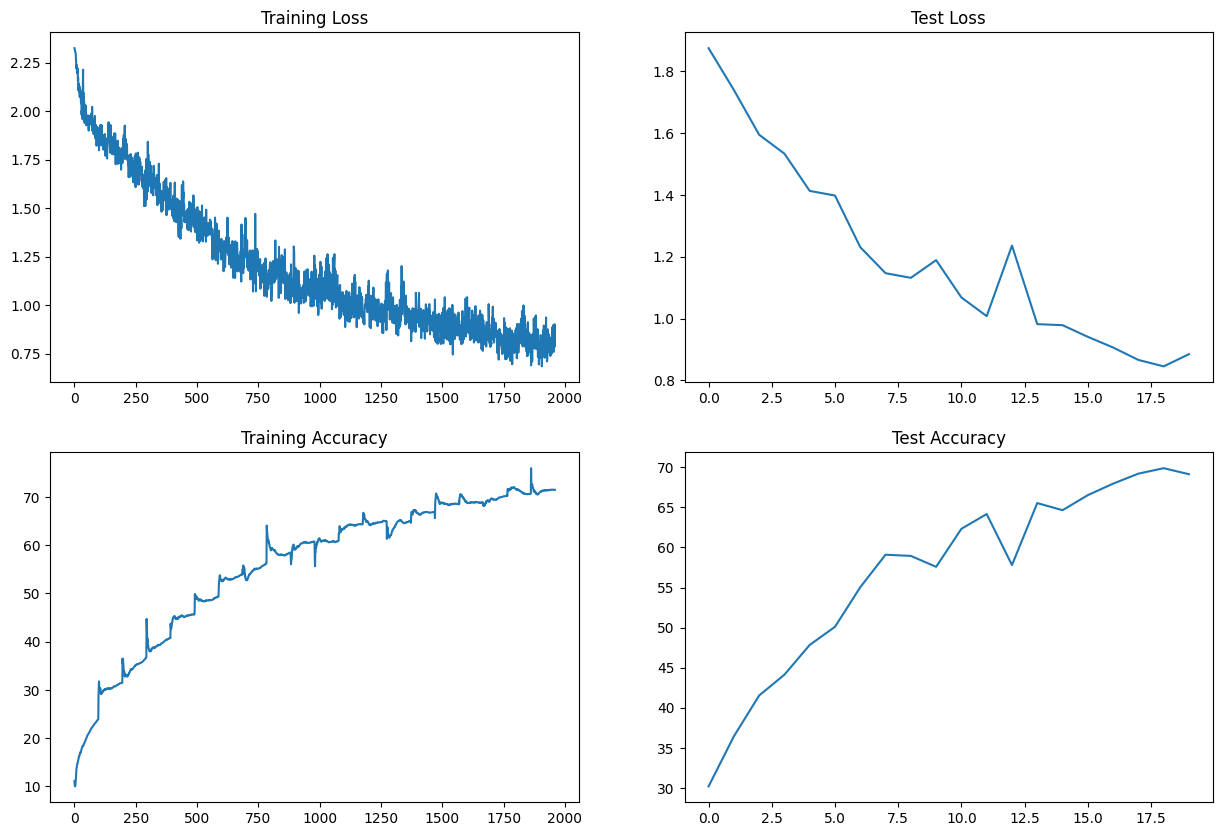

In [ ]:
display_model_stats(train_losses_gn4,
                    train_acc_gn4,
                    test_losses_gn4,
                    test_acc_gn4)

In [ ]:
gn4_incorrect_pred = get_incorrect_test_predictions(model_gn4, device, test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

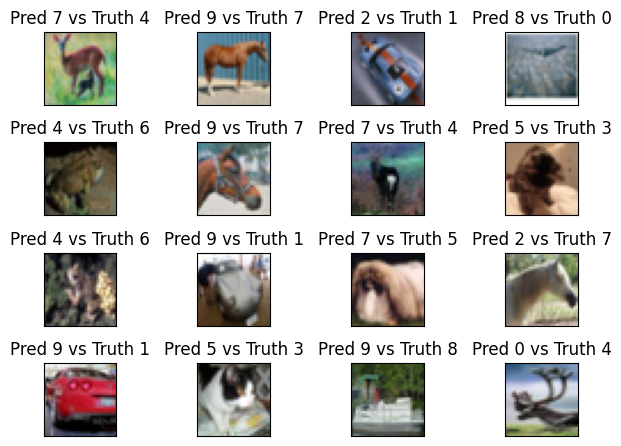

In [ ]:
show_cifar10_incorrect_predictions(gn4_incorrect_pred, classes)

#### Code Block - Model-4 - Group Normalization - Optimal DropOut, LR

**Target:**

- Group Normalization used
- Optimal Dropout found as 0.01 and learning rate 0.1 used

**Results:**

- Parameters: 36.336K
- Best Train Accuracy: 71.48%
- Best Test Accuracy: 69.89%% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is slightly lesser compared to that with batch normalization techniques
- Accuracies and losses are comparatively lower with group normalization comapred to those with batch normalization
- Need to check if layer additions can improve accuracy

### Model-5 - Layer Normalization - Layer Additions


This model uses the Net_14 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 4 and 5; convolution layers 8, 9 and 10. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_ln5 = Net_14('ln', 0.01).to(device)
summary(model_ln5, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           2,304
        GroupNorm-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           9,216
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_ln5 = optim.SGD(model_ln5.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_ln5, train_acc_ln5 = train(model_ln5,
                                            device,
                                            train_loader,
                                            optimizer_ln5,
                                            epoch)
    test_losses_ln5, test_acc_ln5 = test(model_ln5,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.8877058029174805 Batch_id=97 Accuracy=21.17: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]



Test set: Average loss: 1.8828, Accuracy: 2832/10000 (28.32%)

EPOCH: 1


Loss=1.6956427097320557 Batch_id=97 Accuracy=31.07: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.6919, Accuracy: 3463/10000 (34.63%)

EPOCH: 2


Loss=1.5140875577926636 Batch_id=97 Accuracy=37.33: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.5585, Accuracy: 4071/10000 (40.71%)

EPOCH: 3


Loss=1.4458661079406738 Batch_id=97 Accuracy=41.79: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.4665, Accuracy: 4426/10000 (44.26%)

EPOCH: 4


Loss=1.3496685028076172 Batch_id=97 Accuracy=46.49: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 1.3897, Accuracy: 4811/10000 (48.11%)

EPOCH: 5


Loss=1.3190125226974487 Batch_id=97 Accuracy=49.65: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]



Test set: Average loss: 1.4644, Accuracy: 4648/10000 (46.48%)

EPOCH: 6


Loss=1.3162811994552612 Batch_id=97 Accuracy=53.52: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 1.2690, Accuracy: 5321/10000 (53.21%)

EPOCH: 7


Loss=1.1079639196395874 Batch_id=97 Accuracy=55.79: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 1.2103, Accuracy: 5628/10000 (56.28%)

EPOCH: 8


Loss=1.0499337911605835 Batch_id=97 Accuracy=59.10: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]



Test set: Average loss: 1.0962, Accuracy: 6031/10000 (60.31%)

EPOCH: 9


Loss=0.99882572889328 Batch_id=97 Accuracy=60.58: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]



Test set: Average loss: 1.1016, Accuracy: 6013/10000 (60.13%)

EPOCH: 10


Loss=1.162630319595337 Batch_id=97 Accuracy=62.16: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]



Test set: Average loss: 1.0557, Accuracy: 6160/10000 (61.60%)

EPOCH: 11


Loss=1.0380693674087524 Batch_id=97 Accuracy=62.72: 100%|██████████| 98/98 [00:31<00:00,  3.16it/s]



Test set: Average loss: 1.0273, Accuracy: 6303/10000 (63.03%)

EPOCH: 12


Loss=0.9847181439399719 Batch_id=97 Accuracy=64.23: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.0568, Accuracy: 6155/10000 (61.55%)

EPOCH: 13


Loss=0.991937518119812 Batch_id=97 Accuracy=65.47: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 0.9855, Accuracy: 6452/10000 (64.52%)

EPOCH: 14


Loss=0.9565234184265137 Batch_id=97 Accuracy=65.99: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.9501, Accuracy: 6622/10000 (66.22%)

EPOCH: 15


Loss=0.8887415528297424 Batch_id=97 Accuracy=66.88: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 0.9454, Accuracy: 6616/10000 (66.16%)

EPOCH: 16


Loss=0.9760127067565918 Batch_id=97 Accuracy=67.45: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.0180, Accuracy: 6437/10000 (64.37%)

EPOCH: 17


Loss=0.9769920110702515 Batch_id=97 Accuracy=68.09: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]



Test set: Average loss: 1.0116, Accuracy: 6423/10000 (64.23%)

EPOCH: 18


Loss=0.890330970287323 Batch_id=97 Accuracy=68.86: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.9045, Accuracy: 6754/10000 (67.54%)

EPOCH: 19


Loss=0.829545795917511 Batch_id=97 Accuracy=69.79: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]



Test set: Average loss: 0.9423, Accuracy: 6662/10000 (66.62%)



In [ ]:
train_losses_ln5 = [t.cpu().item() for t in train_losses_ln5]

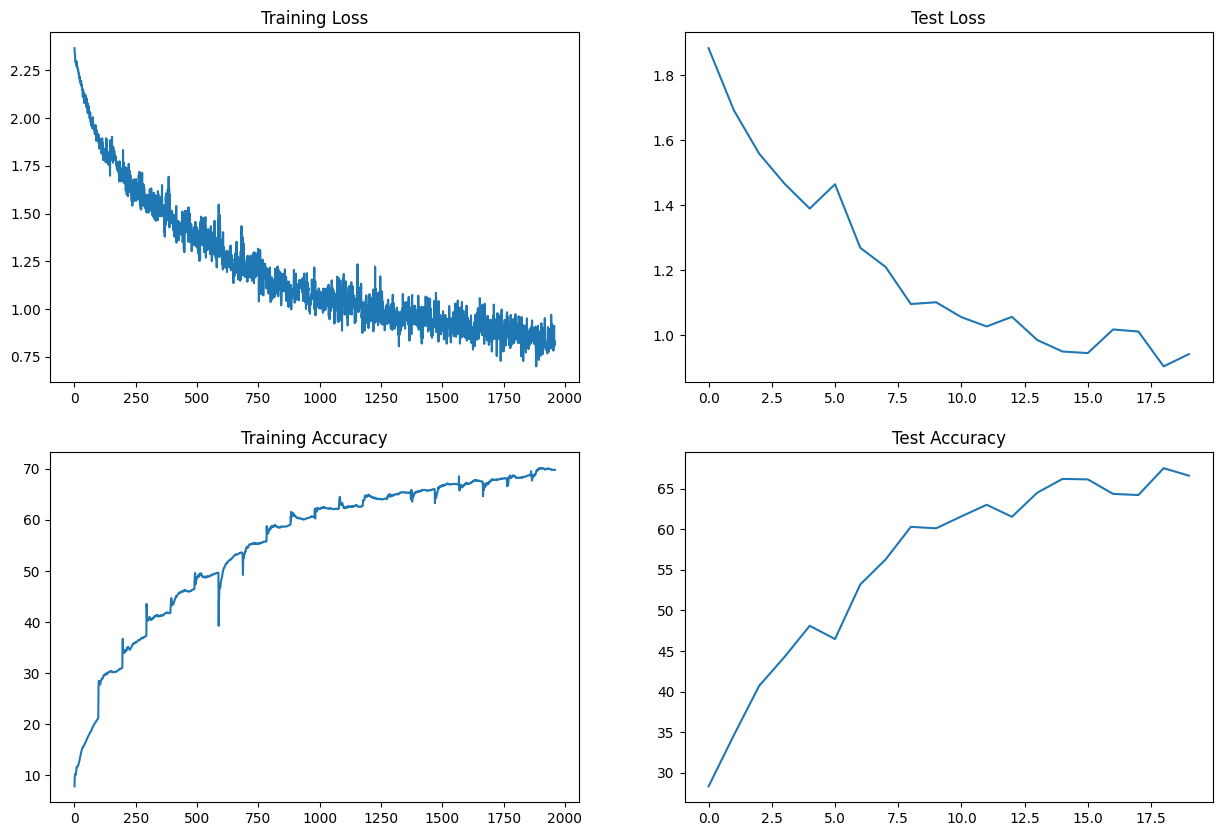

In [ ]:
display_model_stats(train_losses_ln5,
                    train_acc_ln5,
                    test_losses_ln5,
                    test_acc_ln5
                   )

In [ ]:
ln5_incorrect_pred = get_incorrect_test_predictions(model_ln5, device, test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

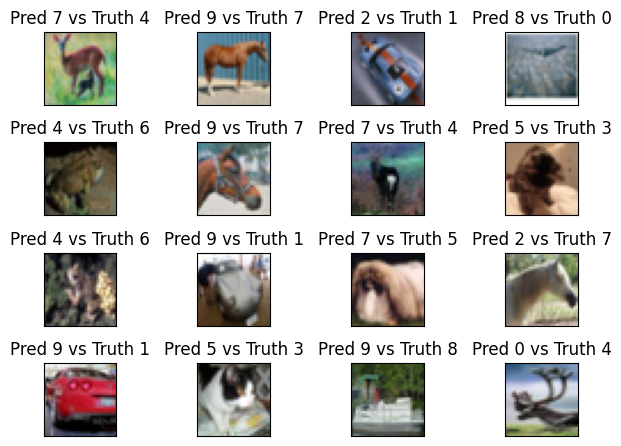

In [ ]:
show_cifar10_incorrect_predictions(ln5_incorrect_pred, classes)

#### Code Block - Model-5 - Layer Normalization - Layer Additions

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- Output of the first convolution block, C8 layer, is added to the output of convolution layer C9, the output of C9 layer is added to the output of convolution layer C9 and subsequently used
- These additions are performed to improve the model performance
- Layer Normalization used
- Dropout of 0.01 and learning rate 0.01 used

**Results:**

- Parameters: 32.592K
- Best Train Accuracy: 68.86%
- Best Test Accuracy: 67.54% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is slightly lesser compared to that with batch normalization techniques
- Accuracies and losses are comparatively lower with layer normalization
- Need to check other layer additions in order to improve accuracy

### Model-5 - Batch Normalization - Layer Additions


This model uses the Net_14 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 4 and 5; convolution layers 8, 9 and 10. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_bn5 = Net_14('bn', 0.05).to(device)
summary(model_bn5, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
       BatchNorm2d-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           2,304
      BatchNorm2d-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           9,216
      BatchNorm2d-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_bn5 = optim.SGD(model_bn5.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_bn5, train_acc_bn5 = train(model_bn5,
                                            device,
                                            train_loader,
                                            optimizer_bn5,
                                            epoch)
    test_losses_bn5, test_acc_bn5 = test(model_bn5,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.3973389863967896 Batch_id=97 Accuracy=33.51: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.4745, Accuracy: 4507/10000 (45.07%)

EPOCH: 1


Loss=1.227021336555481 Batch_id=97 Accuracy=52.36: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 1.3454, Accuracy: 5111/10000 (51.11%)

EPOCH: 2


Loss=0.9686293601989746 Batch_id=97 Accuracy=60.02: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.2086, Accuracy: 5656/10000 (56.56%)

EPOCH: 3


Loss=0.9840306639671326 Batch_id=97 Accuracy=64.03: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 1.0494, Accuracy: 6229/10000 (62.29%)

EPOCH: 4


Loss=0.9164572358131409 Batch_id=97 Accuracy=66.55: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 1.0206, Accuracy: 6367/10000 (63.67%)

EPOCH: 5


Loss=0.7898477911949158 Batch_id=97 Accuracy=69.09: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 0.9040, Accuracy: 6803/10000 (68.03%)

EPOCH: 6


Loss=0.839356005191803 Batch_id=97 Accuracy=70.57: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.9272, Accuracy: 6727/10000 (67.27%)

EPOCH: 7


Loss=0.7966852784156799 Batch_id=97 Accuracy=71.59: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.8220, Accuracy: 7116/10000 (71.16%)

EPOCH: 8


Loss=0.8073403239250183 Batch_id=97 Accuracy=72.81: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 0.7881, Accuracy: 7254/10000 (72.54%)

EPOCH: 9


Loss=0.8321491479873657 Batch_id=97 Accuracy=73.48: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.8447, Accuracy: 7057/10000 (70.57%)

EPOCH: 10


Loss=0.7176176905632019 Batch_id=97 Accuracy=74.24: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.7883, Accuracy: 7235/10000 (72.35%)

EPOCH: 11


Loss=0.7490423917770386 Batch_id=97 Accuracy=74.78: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8319, Accuracy: 7095/10000 (70.95%)

EPOCH: 12


Loss=0.6936089396476746 Batch_id=97 Accuracy=75.56: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 0.8800, Accuracy: 6997/10000 (69.97%)

EPOCH: 13


Loss=0.7527458667755127 Batch_id=97 Accuracy=75.83: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]



Test set: Average loss: 0.7418, Accuracy: 7419/10000 (74.19%)

EPOCH: 14


Loss=0.6364100575447083 Batch_id=97 Accuracy=76.40: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]



Test set: Average loss: 0.7447, Accuracy: 7392/10000 (73.92%)

EPOCH: 15


Loss=0.7412548065185547 Batch_id=97 Accuracy=76.79: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 0.7661, Accuracy: 7421/10000 (74.21%)

EPOCH: 16


Loss=0.6496826410293579 Batch_id=97 Accuracy=77.08: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.7073, Accuracy: 7562/10000 (75.62%)

EPOCH: 17


Loss=0.6952442526817322 Batch_id=97 Accuracy=77.49: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.7096, Accuracy: 7558/10000 (75.58%)

EPOCH: 18


Loss=0.6332736015319824 Batch_id=97 Accuracy=77.77: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 0.7640, Accuracy: 7405/10000 (74.05%)

EPOCH: 19


Loss=0.661127507686615 Batch_id=97 Accuracy=78.25: 100%|██████████| 98/98 [00:29<00:00,  3.34it/s]



Test set: Average loss: 0.6803, Accuracy: 7652/10000 (76.52%)



In [ ]:
train_losses_bn5 = [t.cpu().item() for t in train_losses_bn5]

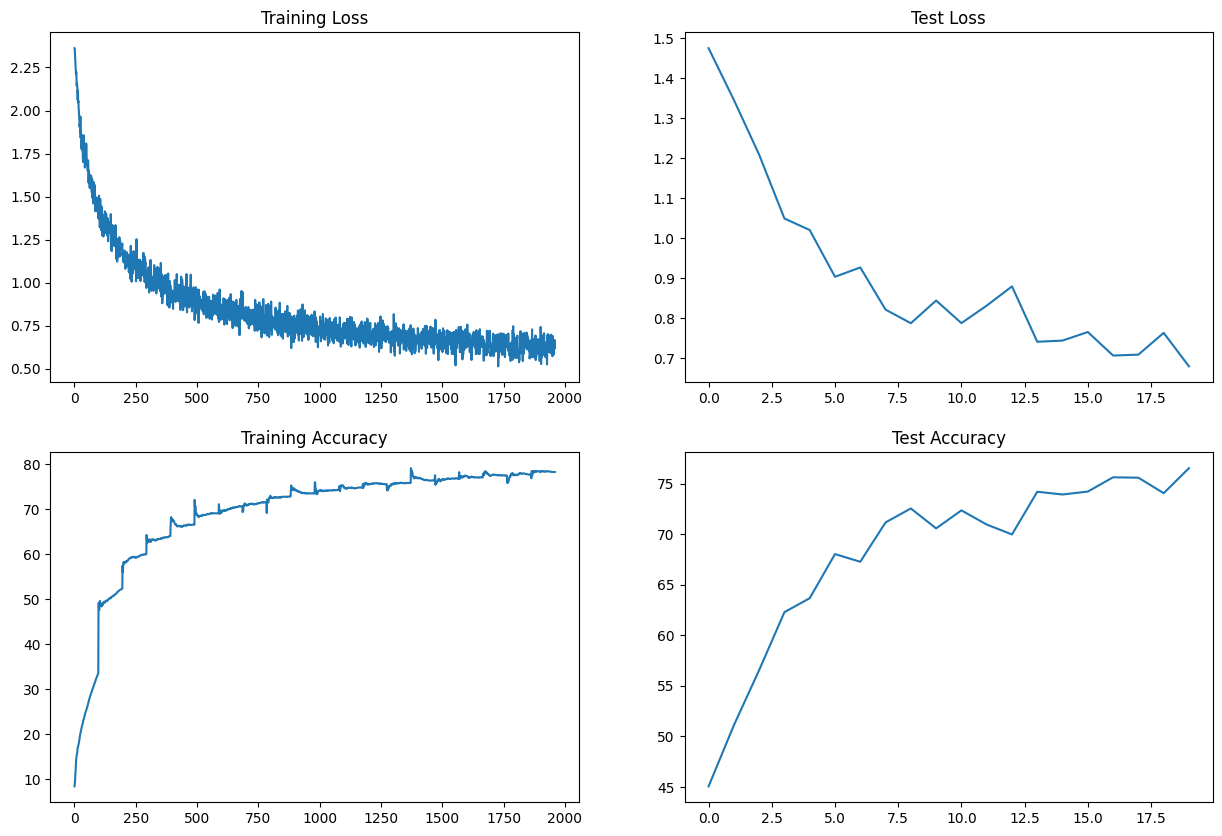

In [ ]:
display_model_stats(train_losses_bn5,
                    train_acc_bn5,
                    test_losses_bn5,
                    test_acc_bn5)

In [ ]:
bn5_incorrect_pred = get_incorrect_test_predictions(model_bn5, device, test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

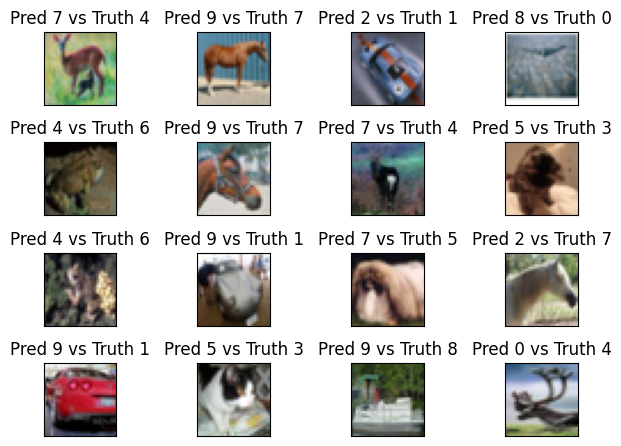

In [ ]:
show_cifar10_incorrect_predictions(bn5_incorrect_pred, classes)

#### Code Block - Model-5 - Batch Normalization - Layer Additions

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- Output of the first convolution block, C8 layer, is added to the output of convolution layer C9, the output of C9 layer is added to the output of convolution layer C9 and subsequently used
- These additions are performed to improve the model performance
- Batch Normalization used
- Dropout of 0.05 and learning rate 0.1 used

**Results:**

- Parameters: 32.592K
- Best Train Accuracy: 78.25%
- Best Test Accuracy: 76.52% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is slightly more with batch normalization techniques
- Accuracies and losses are comparatively higher with batch normalization
- Need to check other layer additions in order to improve accuracy

### Model-5 - Group Normalization - Layer Additions


This model uses the Net_14 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 4 and 5; convolution layers 8, 9 and 10. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_gn5 = Net_14('gn', 0.01).to(device)
summary(model_gn5, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
         GroupNorm-2           [-1, 16, 30, 30]              32
           Dropout-3           [-1, 16, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           4,608
         GroupNorm-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7            [-1, 8, 28, 28]             256
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9           [-1, 32, 14, 14]           2,304
        GroupNorm-10           [-1, 32, 14, 14]              64
          Dropout-11           [-1, 32, 14, 14]               0
           Conv2d-12           [-1, 32, 14, 14]           9,216
        GroupNorm-13           [-1, 32, 14, 14]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_gn5 = optim.SGD(model_gn5.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_gn5, train_acc_gn5 = train(model_gn5,
                                            device,
                                            train_loader,
                                            optimizer_gn5,
                                            epoch)
    test_losses_gn5, test_acc_gn5 = test(model_gn5,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.8802531957626343 Batch_id=97 Accuracy=22.49: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



Test set: Average loss: 1.9038, Accuracy: 2851/10000 (28.51%)

EPOCH: 1


Loss=1.7872986793518066 Batch_id=97 Accuracy=31.32: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 1.7549, Accuracy: 3425/10000 (34.25%)

EPOCH: 2


Loss=1.690368413925171 Batch_id=97 Accuracy=37.12: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]



Test set: Average loss: 1.6751, Accuracy: 3801/10000 (38.01%)

EPOCH: 3


Loss=1.5892372131347656 Batch_id=97 Accuracy=42.67: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.5613, Accuracy: 4150/10000 (41.50%)

EPOCH: 4


Loss=1.383054494857788 Batch_id=97 Accuracy=47.26: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]



Test set: Average loss: 1.4492, Accuracy: 4786/10000 (47.86%)

EPOCH: 5


Loss=1.2687169313430786 Batch_id=97 Accuracy=51.16: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]



Test set: Average loss: 1.2930, Accuracy: 5295/10000 (52.95%)

EPOCH: 6


Loss=1.2540457248687744 Batch_id=97 Accuracy=54.86: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 1.2346, Accuracy: 5579/10000 (55.79%)

EPOCH: 7


Loss=1.2410112619400024 Batch_id=97 Accuracy=56.61: 100%|██████████| 98/98 [00:38<00:00,  2.52it/s]



Test set: Average loss: 1.2164, Accuracy: 5590/10000 (55.90%)

EPOCH: 8


Loss=1.0170598030090332 Batch_id=97 Accuracy=59.39: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]



Test set: Average loss: 1.0961, Accuracy: 6132/10000 (61.32%)

EPOCH: 9


Loss=1.142467737197876 Batch_id=97 Accuracy=61.53: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]



Test set: Average loss: 1.2003, Accuracy: 5762/10000 (57.62%)

EPOCH: 10


Loss=1.269798994064331 Batch_id=97 Accuracy=62.46: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]



Test set: Average loss: 1.0631, Accuracy: 6232/10000 (62.32%)

EPOCH: 11


Loss=0.957170844078064 Batch_id=97 Accuracy=64.12: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 1.0311, Accuracy: 6308/10000 (63.08%)

EPOCH: 12


Loss=0.9595299959182739 Batch_id=97 Accuracy=65.03: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.9955, Accuracy: 6518/10000 (65.18%)

EPOCH: 13


Loss=0.8721798658370972 Batch_id=97 Accuracy=66.92: 100%|██████████| 98/98 [00:30<00:00,  3.18it/s]



Test set: Average loss: 0.9435, Accuracy: 6671/10000 (66.71%)

EPOCH: 14


Loss=0.9245303273200989 Batch_id=97 Accuracy=67.45: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 1.0037, Accuracy: 6479/10000 (64.79%)

EPOCH: 15


Loss=0.926520824432373 Batch_id=97 Accuracy=67.85: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.9764, Accuracy: 6597/10000 (65.97%)

EPOCH: 16


Loss=0.9376475811004639 Batch_id=97 Accuracy=68.20: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.9231, Accuracy: 6746/10000 (67.46%)

EPOCH: 17


Loss=0.9244702458381653 Batch_id=97 Accuracy=69.17: 100%|██████████| 98/98 [00:30<00:00,  3.25it/s]



Test set: Average loss: 0.9226, Accuracy: 6829/10000 (68.29%)

EPOCH: 18


Loss=0.8320008516311646 Batch_id=97 Accuracy=70.28: 100%|██████████| 98/98 [00:30<00:00,  3.23it/s]



Test set: Average loss: 0.8908, Accuracy: 6899/10000 (68.99%)

EPOCH: 19


Loss=0.8317831754684448 Batch_id=97 Accuracy=70.57: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.8998, Accuracy: 6866/10000 (68.66%)



In [ ]:
train_losses_gn5 = [t.cpu().item() for t in train_losses_gn5]

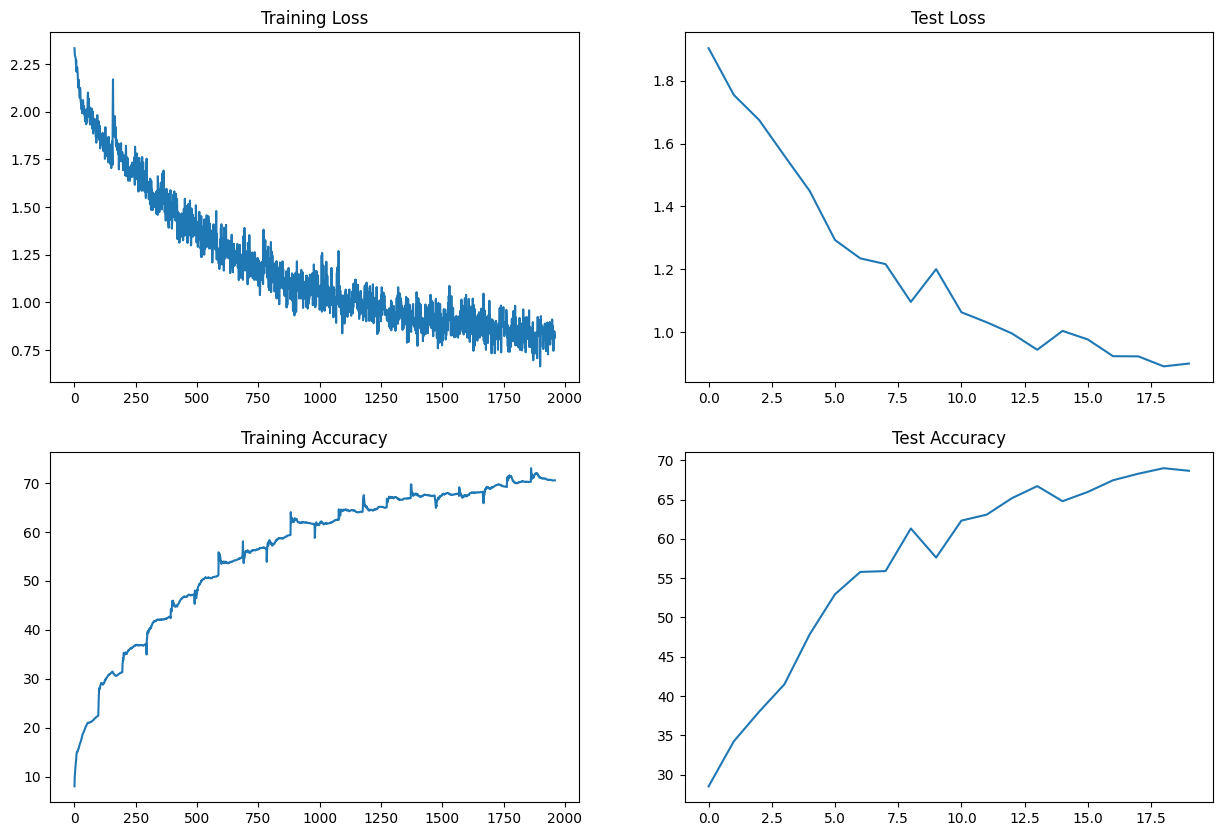

In [ ]:
display_model_stats(train_losses_gn5,
                    train_acc_gn5,
                    test_losses_gn5,
                    test_acc_gn5)

In [ ]:
gn5_incorrect_pred = get_incorrect_test_predictions(model_gn5,
                                                    device,
                                                    test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

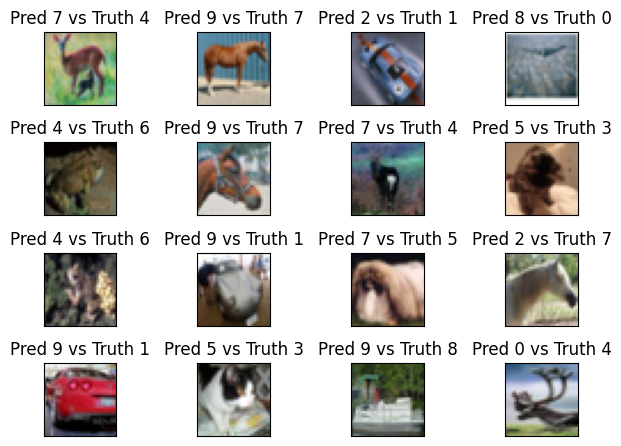

In [ ]:
show_cifar10_incorrect_predictions(gn5_incorrect_pred, classes)

#### Code Block - Model-5 - Group Normalization - Layer Additions

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- Output of the first convolution block, C8 layer, is added to the output of convolution layer C9, the output of C9 layer is added to the output of convolution layer C9 and subsequently used
- These additions are performed to improve the model performance
- Group Normalization used with group size 2
- Dropout of 0.01 and learning rate 0.1 used

**Results:**

- Parameters: 32.592K
- Best Train Accuracy: 70.57%
- Best Test Accuracy: 68.66% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is lesser compared to that found with batch normalization techniques
- Learning with group normalization is slower compared to that with batch normalization technique
- Accuracies and losses are lower with group normalization technique compared to those with batch normalization
- Need to check other layer additions in order to improve accuracy

### Model-6 - Layer Normalization - Layer Additions2 - Final Optimal Model


This model uses the Net_15 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 1 and 2; convolution layers 4 and 5. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_ln6 = Net_15('ln', 0.01).to(device)
summary(model_ln6, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
         GroupNorm-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
         GroupNorm-5           [-1, 32, 32, 32]              64
           Dropout-6           [-1, 32, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             256
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           2,304
        GroupNorm-10           [-1, 32, 16, 16]              64
          Dropout-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
        GroupNorm-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_ln6 = optim.SGD(model_ln6.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_ln6, train_acc_ln6 = train(model_ln6,
                                            device,
                                            train_loader,
                                            optimizer_ln6,
                                            epoch)
    test_losses_ln6, test_acc_ln6 = test(model_ln6,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.9224839210510254 Batch_id=97 Accuracy=21.91: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 1.9044, Accuracy: 2781/10000 (27.81%)

EPOCH: 1


Loss=1.5904412269592285 Batch_id=97 Accuracy=33.59: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]



Test set: Average loss: 1.6640, Accuracy: 3877/10000 (38.77%)

EPOCH: 2


Loss=1.3977364301681519 Batch_id=97 Accuracy=40.92: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]



Test set: Average loss: 1.4731, Accuracy: 4496/10000 (44.96%)

EPOCH: 3


Loss=1.4101709127426147 Batch_id=97 Accuracy=46.60: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]



Test set: Average loss: 1.3775, Accuracy: 5002/10000 (50.02%)

EPOCH: 4


Loss=1.2797532081604004 Batch_id=97 Accuracy=49.72: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]



Test set: Average loss: 1.2879, Accuracy: 5251/10000 (52.51%)

EPOCH: 5


Loss=1.230999231338501 Batch_id=97 Accuracy=53.85: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]



Test set: Average loss: 1.2491, Accuracy: 5475/10000 (54.75%)

EPOCH: 6


Loss=1.1773836612701416 Batch_id=97 Accuracy=56.58: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]



Test set: Average loss: 1.2791, Accuracy: 5423/10000 (54.23%)

EPOCH: 7


Loss=1.2156740427017212 Batch_id=97 Accuracy=58.62: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 1.1421, Accuracy: 5822/10000 (58.22%)

EPOCH: 8


Loss=1.040797233581543 Batch_id=97 Accuracy=60.72: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 1.0791, Accuracy: 5976/10000 (59.76%)

EPOCH: 9


Loss=1.0478224754333496 Batch_id=97 Accuracy=62.08: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]



Test set: Average loss: 1.1368, Accuracy: 5907/10000 (59.07%)

EPOCH: 10


Loss=0.8974229693412781 Batch_id=97 Accuracy=63.28: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]



Test set: Average loss: 1.0264, Accuracy: 6273/10000 (62.73%)

EPOCH: 11


Loss=1.002387523651123 Batch_id=97 Accuracy=64.25: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 1.0585, Accuracy: 6158/10000 (61.58%)

EPOCH: 12


Loss=0.835520327091217 Batch_id=97 Accuracy=65.68: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.9728, Accuracy: 6465/10000 (64.65%)

EPOCH: 13


Loss=0.8864092826843262 Batch_id=97 Accuracy=67.01: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]



Test set: Average loss: 0.9383, Accuracy: 6635/10000 (66.35%)

EPOCH: 14


Loss=0.8253453373908997 Batch_id=97 Accuracy=68.13: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.9511, Accuracy: 6610/10000 (66.10%)

EPOCH: 15


Loss=0.7421662211418152 Batch_id=97 Accuracy=68.40: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]



Test set: Average loss: 0.9298, Accuracy: 6694/10000 (66.94%)

EPOCH: 16


Loss=0.859351634979248 Batch_id=97 Accuracy=69.38: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.9261, Accuracy: 6752/10000 (67.52%)

EPOCH: 17


Loss=0.8918324708938599 Batch_id=97 Accuracy=70.09: 100%|██████████| 98/98 [00:27<00:00,  3.57it/s]



Test set: Average loss: 0.8929, Accuracy: 6790/10000 (67.90%)

EPOCH: 18


Loss=0.7881949543952942 Batch_id=97 Accuracy=70.67: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 0.8878, Accuracy: 6846/10000 (68.46%)

EPOCH: 19


Loss=0.8189401030540466 Batch_id=97 Accuracy=71.22: 100%|██████████| 98/98 [00:28<00:00,  3.43it/s]



Test set: Average loss: 0.8542, Accuracy: 6959/10000 (69.59%)



In [ ]:
train_losses_ln6 = [t.cpu().item() for t in train_losses_ln6]

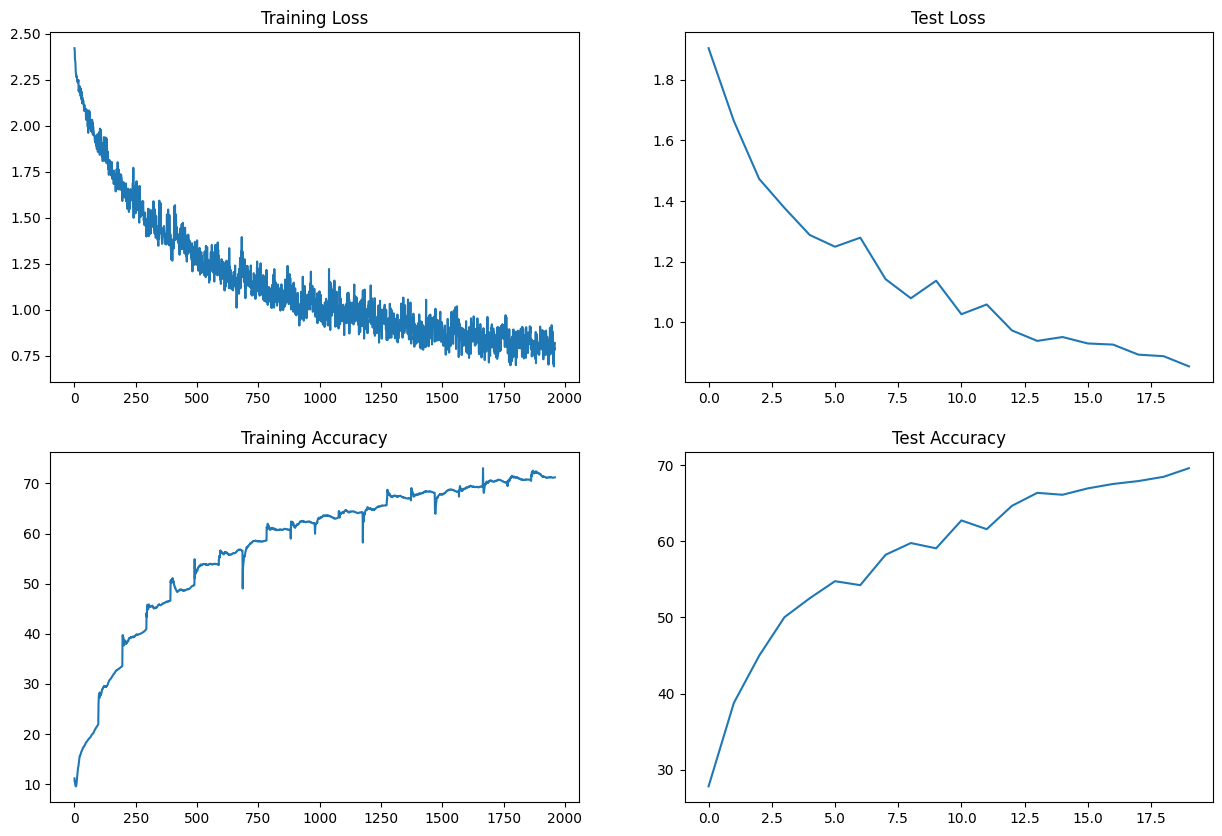

In [ ]:
display_model_stats(train_losses_ln6,
                    train_acc_ln6,
                    test_losses_ln6,
                    test_acc_ln6)

In [ ]:
ln6_incorrect_pred = get_incorrect_test_predictions(model_ln6,
                                                    device,
                                                    test_loader) # Predicted vs Actual

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

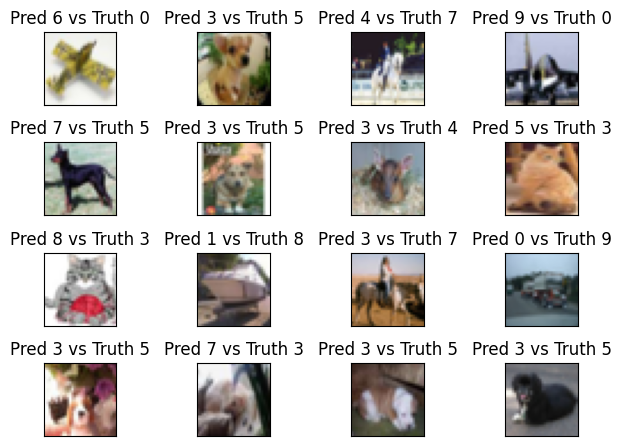

In [ ]:
show_cifar10_incorrect_predictions(ln6_incorrect_pred, classes)

#### Code Block - Model-6 - Layer Normalization - Layer Additions2 - Final Optimal Model

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C1 layer, is added to the output of convolution layer C2 and subsequently used
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- These additions are performed to improve the model performance
- Layer Normalization used
- Dropout of 0.01 and learning rate 0.01 used

**Results:**

- Parameters: 37.664K
- Best Train Accuracy: 71.22%
- Best Test Accuracy: 69.59% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model.
- Over-fitting is lesser compared to that found with batch normalization techniques
- Learning with layer normalization is slower compared to that with batch normalization technique
- Accuracies and losses are lower with group normalization technique compared to those with batch normalization
- Improvement to this could be scheduling for adaptive learning rate to push the model for better accuracies.

### Model-6 - Group Normalization - Layer Additions2 - Final Optimal Model


This model uses the Net_15 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 1 and 2; convolution layers 4 and 5. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_gn6 = Net_15('gn', 0.01).to(device)
summary(model_gn6, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
         GroupNorm-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
         GroupNorm-5           [-1, 32, 32, 32]              64
           Dropout-6           [-1, 32, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             256
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           2,304
        GroupNorm-10           [-1, 32, 16, 16]              64
          Dropout-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
        GroupNorm-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_gn6 = optim.SGD(model_gn6.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_gn6, train_acc_gn6 = train(model_gn6,
                                            device,
                                            train_loader,
                                            optimizer_gn6,
                                            epoch)
    test_losses_gn6, test_acc_gn6 = test(model_gn6,
                                         device,
                                         test_loader)

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.943804383277893 Batch_id=97 Accuracy=20.81: 100%|██████████| 98/98 [00:29<00:00,  3.33it/s]



Test set: Average loss: 1.9311, Accuracy: 2709/10000 (27.09%)

EPOCH: 1


Loss=1.7928621768951416 Batch_id=97 Accuracy=30.95: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 1.7824, Accuracy: 3391/10000 (33.91%)

EPOCH: 2


Loss=1.7109287977218628 Batch_id=97 Accuracy=36.46: 100%|██████████| 98/98 [00:29<00:00,  3.29it/s]



Test set: Average loss: 1.6372, Accuracy: 3989/10000 (39.89%)

EPOCH: 3


Loss=1.601590633392334 Batch_id=97 Accuracy=40.04: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 1.5941, Accuracy: 4207/10000 (42.07%)

EPOCH: 4


Loss=1.5487452745437622 Batch_id=97 Accuracy=44.26: 100%|██████████| 98/98 [00:34<00:00,  2.80it/s]



Test set: Average loss: 1.4099, Accuracy: 4817/10000 (48.17%)

EPOCH: 5


Loss=1.2636997699737549 Batch_id=97 Accuracy=48.72: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]



Test set: Average loss: 1.3506, Accuracy: 5049/10000 (50.49%)

EPOCH: 6


Loss=1.302003026008606 Batch_id=97 Accuracy=52.80: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]



Test set: Average loss: 1.2974, Accuracy: 5402/10000 (54.02%)

EPOCH: 7


Loss=1.1416126489639282 Batch_id=97 Accuracy=55.10: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]



Test set: Average loss: 1.1393, Accuracy: 5946/10000 (59.46%)

EPOCH: 8


Loss=1.086746335029602 Batch_id=97 Accuracy=59.26: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]



Test set: Average loss: 1.1239, Accuracy: 5916/10000 (59.16%)

EPOCH: 9


Loss=1.089669942855835 Batch_id=97 Accuracy=60.86: 100%|██████████| 98/98 [00:30<00:00,  3.26it/s]



Test set: Average loss: 1.0481, Accuracy: 6229/10000 (62.29%)

EPOCH: 10


Loss=1.018776774406433 Batch_id=97 Accuracy=63.40: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]



Test set: Average loss: 1.0258, Accuracy: 6345/10000 (63.45%)

EPOCH: 11


Loss=1.0368387699127197 Batch_id=97 Accuracy=64.91: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 1.0044, Accuracy: 6384/10000 (63.84%)

EPOCH: 12


Loss=0.933536171913147 Batch_id=97 Accuracy=66.56: 100%|██████████| 98/98 [00:29<00:00,  3.31it/s]



Test set: Average loss: 1.0018, Accuracy: 6485/10000 (64.85%)

EPOCH: 13


Loss=0.8818919658660889 Batch_id=97 Accuracy=68.06: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]



Test set: Average loss: 0.9320, Accuracy: 6704/10000 (67.04%)

EPOCH: 14


Loss=0.8763135075569153 Batch_id=97 Accuracy=69.61: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8818, Accuracy: 6815/10000 (68.15%)

EPOCH: 15


Loss=0.7713274359703064 Batch_id=97 Accuracy=70.09: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]



Test set: Average loss: 0.8897, Accuracy: 6856/10000 (68.56%)

EPOCH: 16


Loss=0.7757500410079956 Batch_id=97 Accuracy=71.18: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.8785, Accuracy: 6875/10000 (68.75%)

EPOCH: 17


Loss=0.7864674925804138 Batch_id=97 Accuracy=72.39: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.8117, Accuracy: 7136/10000 (71.36%)

EPOCH: 18


Loss=0.8011317253112793 Batch_id=97 Accuracy=72.65: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.8579, Accuracy: 6919/10000 (69.19%)

EPOCH: 19


Loss=0.8464945554733276 Batch_id=97 Accuracy=74.26: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.7860, Accuracy: 7246/10000 (72.46%)



In [ ]:
train_losses_gn6 = [t.cpu().item() for t in train_losses_gn6]

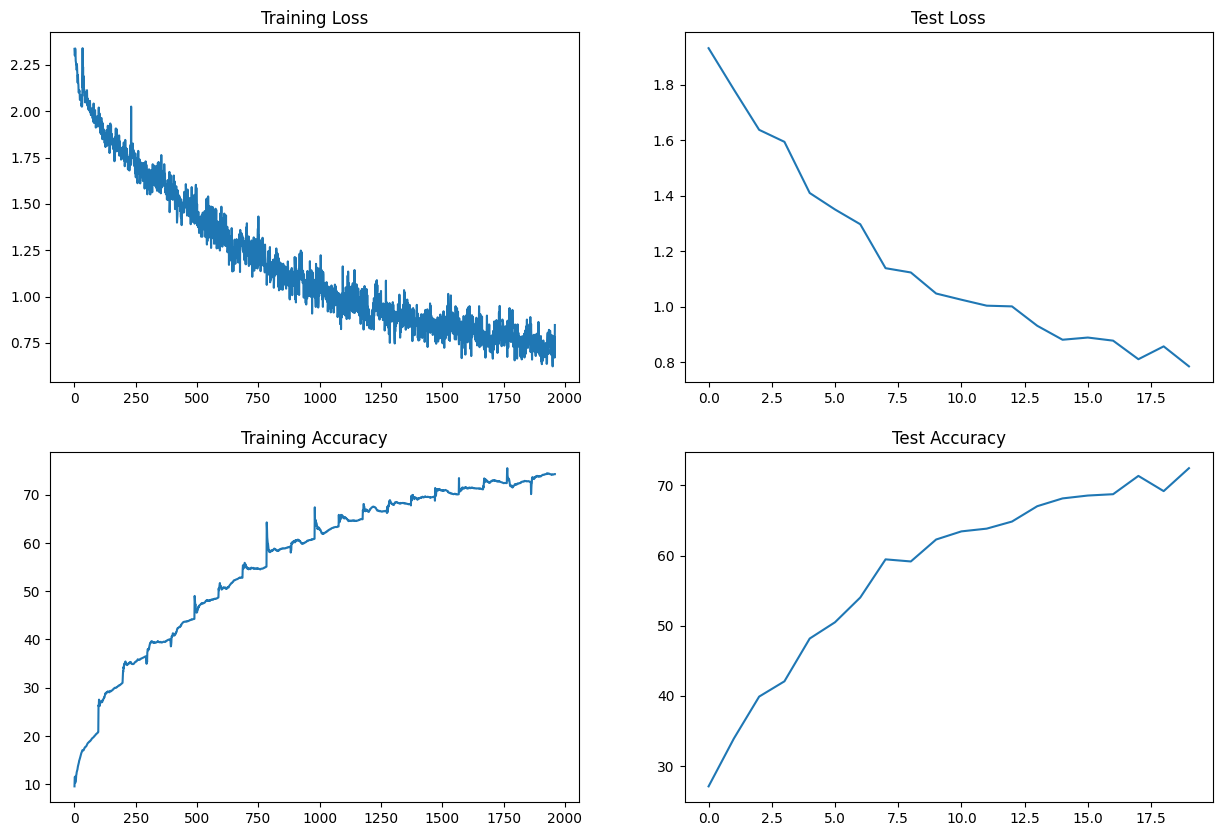

In [ ]:
display_model_stats(train_losses_gn6,
                    train_acc_gn6,
                    test_losses_gn6,
                    test_acc_gn6)

In [ ]:
gn6_incorrect_pred = get_incorrect_test_predictions(model_gn6,
                                                    device,
                                                    test_loader) # Predicted vs Actual

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

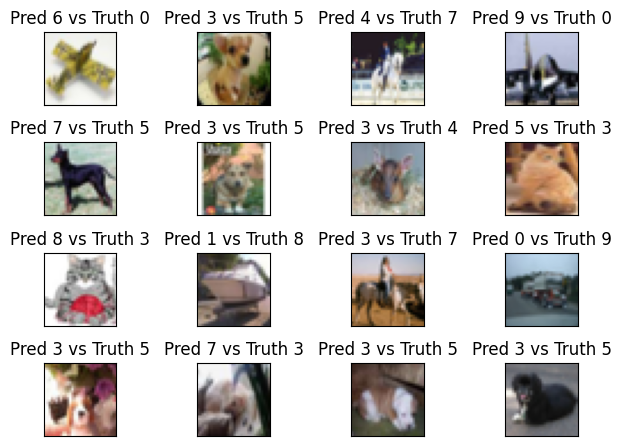

In [ ]:
show_cifar10_incorrect_predictions(gn6_incorrect_pred, classes)

#### Code Block - Model-6 - Group Normalization - Layer Additions2 - Final Optimal Model

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C1 layer, is added to the output of convolution layer C2 and subsequently used
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- These additions are performed to improve the model performance
- Group Normalization used with group size 2
- Dropout of 0.01 and learning rate 0.1 used

**Results:**

- Parameters: 37.664K
- Best Train Accuracy: 74.26%
- Best Test Accuracy: 72.46% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Over-fitting is lesser compared to that found with batch normalization techniques
- Learning with group normalization is slower compared to that with batch normalization technique
- Accuracies and losses are lower with group normalization technique compared to those with batch normalization
- Improvement to this could be scheduling for adaptive learning rate to push the model for better accuracies.

### Model-6 - Batch Normalization - Layer Additions2 - Final Optimal Model


This model uses the Net_15 as the network architecture which performs layer additions internally. This architecture performs the additions of convolution layers 1 and 2; convolution layers 4 and 5. This model also uses the optimal dropout and learninng rate.

In [ ]:
model_bn6 = Net_15('bn', 0.05).to(device)
summary(model_bn6, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
       BatchNorm2d-5           [-1, 32, 32, 32]              64
           Dropout-6           [-1, 32, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             256
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           2,304
      BatchNorm2d-10           [-1, 32, 16, 16]              64
          Dropout-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [ ]:
clear_model_stats()

In [ ]:
optimizer_bn6 = optim.SGD(model_bn6.parameters(), lr=0.1, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses_bn6, train_acc_bn6 = train(model_bn6,
                                            device,
                                            train_loader,
                                            optimizer_bn6,
                                            epoch)
    test_losses_bn6, test_acc_bn6 = test(model_bn6,
                                         device,
                                         test_loader)

EPOCH: 0


Loss=1.324897289276123 Batch_id=97 Accuracy=34.25: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 1.6491, Accuracy: 4073/10000 (40.73%)

EPOCH: 1


Loss=1.196306586265564 Batch_id=97 Accuracy=52.82: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 1.2566, Accuracy: 5360/10000 (53.60%)

EPOCH: 2


Loss=1.0161371231079102 Batch_id=97 Accuracy=60.07: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]



Test set: Average loss: 1.3338, Accuracy: 5316/10000 (53.16%)

EPOCH: 3


Loss=0.9723566174507141 Batch_id=97 Accuracy=64.18: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]



Test set: Average loss: 1.0234, Accuracy: 6382/10000 (63.82%)

EPOCH: 4


Loss=0.9324954748153687 Batch_id=97 Accuracy=67.15: 100%|██████████| 98/98 [00:35<00:00,  2.76it/s]



Test set: Average loss: 1.0223, Accuracy: 6408/10000 (64.08%)

EPOCH: 5


Loss=0.8918099403381348 Batch_id=97 Accuracy=69.01: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]



Test set: Average loss: 0.9837, Accuracy: 6472/10000 (64.72%)

EPOCH: 6


Loss=0.8866297602653503 Batch_id=97 Accuracy=70.79: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]



Test set: Average loss: 0.9029, Accuracy: 6743/10000 (67.43%)

EPOCH: 7


Loss=0.8394114375114441 Batch_id=97 Accuracy=71.88: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.8381, Accuracy: 7059/10000 (70.59%)

EPOCH: 8


Loss=0.6709018349647522 Batch_id=97 Accuracy=73.01: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.9258, Accuracy: 6794/10000 (67.94%)

EPOCH: 9


Loss=0.8073302507400513 Batch_id=97 Accuracy=73.85: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.8034, Accuracy: 7153/10000 (71.53%)

EPOCH: 10


Loss=0.7930790185928345 Batch_id=97 Accuracy=74.44: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]



Test set: Average loss: 0.7849, Accuracy: 7211/10000 (72.11%)

EPOCH: 11


Loss=0.6606057286262512 Batch_id=97 Accuracy=75.06: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]



Test set: Average loss: 0.7852, Accuracy: 7236/10000 (72.36%)

EPOCH: 12


Loss=0.6999080181121826 Batch_id=97 Accuracy=75.75: 100%|██████████| 98/98 [00:30<00:00,  3.19it/s]



Test set: Average loss: 0.8423, Accuracy: 7119/10000 (71.19%)

EPOCH: 13


Loss=0.6670157313346863 Batch_id=97 Accuracy=76.31: 100%|██████████| 98/98 [00:30<00:00,  3.22it/s]



Test set: Average loss: 0.7605, Accuracy: 7325/10000 (73.25%)

EPOCH: 14


Loss=0.7744030952453613 Batch_id=97 Accuracy=77.03: 100%|██████████| 98/98 [00:30<00:00,  3.24it/s]



Test set: Average loss: 0.7897, Accuracy: 7279/10000 (72.79%)

EPOCH: 15


Loss=0.6213580369949341 Batch_id=97 Accuracy=77.02: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]



Test set: Average loss: 0.7499, Accuracy: 7455/10000 (74.55%)

EPOCH: 16


Loss=0.6052252650260925 Batch_id=97 Accuracy=77.75: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.7177, Accuracy: 7521/10000 (75.21%)

EPOCH: 17


Loss=0.6921373605728149 Batch_id=97 Accuracy=77.95: 100%|██████████| 98/98 [00:29<00:00,  3.27it/s]



Test set: Average loss: 0.7528, Accuracy: 7404/10000 (74.04%)

EPOCH: 18


Loss=0.6309443116188049 Batch_id=97 Accuracy=78.16: 100%|██████████| 98/98 [00:29<00:00,  3.28it/s]



Test set: Average loss: 0.7101, Accuracy: 7568/10000 (75.68%)

EPOCH: 19


Loss=0.6795818209648132 Batch_id=97 Accuracy=78.89: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]



Test set: Average loss: 0.8211, Accuracy: 7205/10000 (72.05%)



In [ ]:
train_losses_bn6 = [t.cpu().item() for t in train_losses_bn6]

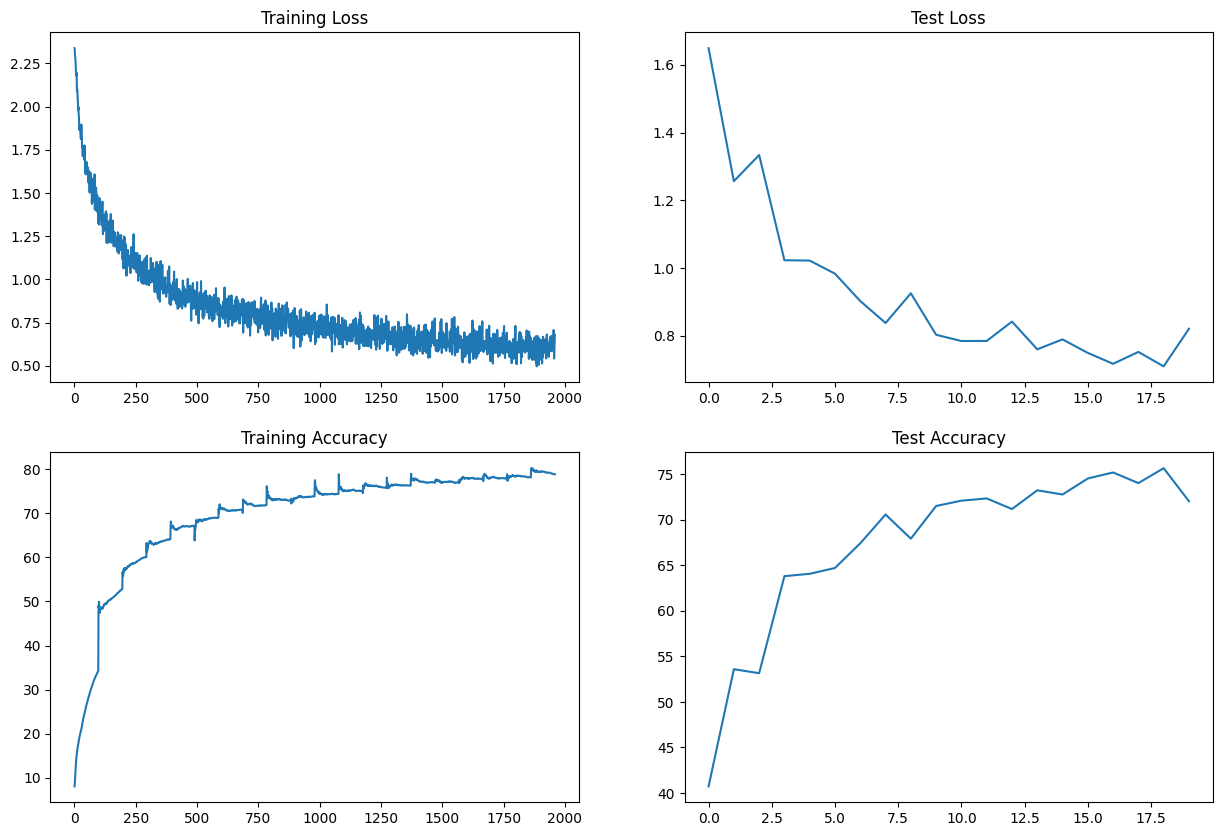

In [ ]:
display_model_stats(train_losses_bn6,
                    train_acc_bn6,
                    test_losses_bn6,
                    test_acc_bn6)

In [ ]:
bn6_incorrect_pred = get_incorrect_test_predictions(model_bn6,
                                                    device,
                                                    test_loader) # Predicted vs Actual

0 - 'airplane' 1 - 'automobile' 2 - 'bird' 3 - 'cat' 4 - 'deer' 5 - 'dog' 6 - 'frog' 7 - 'horse' 8 - 'ship' 9 - 'truck' 

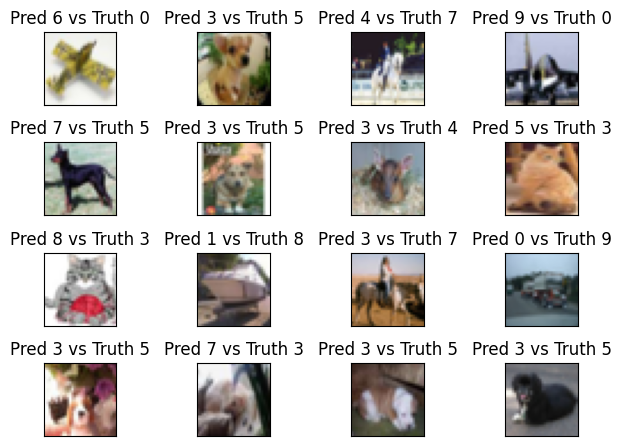

In [ ]:
show_cifar10_incorrect_predictions(bn6_incorrect_pred, classes)

#### Code Block - Model-6 - Batch Normalization - Layer Additions2 - Final Optimal Model

**Target:**

- Layer Structure - C1 C2 c3 P1 C3 C4 C5 c6 P2 C7 C8 C9 GAP c10 where c3, c6, c10 are 1x1 convolutions and rest are the 3x3 convolutions. P1 and P2 are the max pool layers
- Output of the first convolution block, C1 layer, is added to the output of convolution layer C2 and subsequently used
- Output of the first convolution block, C4 layer, is added to the output of convolution layer C5 and subsequently used
- These additions are performed to improve the model performance
- Batch Normalization used
- Dropout of 0.05 and learning rate 0.1 used

**Results:**

- Parameters: 37.664K
- Best Train Accuracy: 78.89%
- Best Test Accuracy: 75.68% (19th Epoch)

**Analysis:**
- Model over fitting improved compared to the basic model structure. Still there is some over-fitting of the model
- Accuracies and losses are better with batch normalization technique compared to those with layer normalization and group normalization
- Improvement to this could be scheduling for adaptive learning rate to push the model for better accuracies.